In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from matplotlib import rcParams 
rcParams.update({'font.size': 18})

In [1]:
import tensorflow as tf
import tensorflow.python.keras.backend as K
from tensorflow.python.keras.backend import eager_learning_phase_scope

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
# tf.compat.v1.disable_eager_execution()

In [2]:
tf.__version__

'2.2.0'

In [5]:
import xarray as xr
import os

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [5]:
temp = xr.open_dataset('/srv/scratch/z3289452/OceanDataScience/Mooring/PH100/IMOS_ANMN-NSW_TZ_20091029_PH100_FV01_TEMP-aggregated-timeseries_END-20190612_C-20190819.nc')

In [6]:
temp

<xarray.Dataset>
Dimensions:                   (INSTRUMENT: 688, OBSERVATION: 25570235)
Coordinates:
    TIME                      (OBSERVATION) datetime64[ns] ...
    LONGITUDE                 (INSTRUMENT) float32 ...
    LATITUDE                  (INSTRUMENT) float32 ...
    NOMINAL_DEPTH             (INSTRUMENT) float32 ...
Dimensions without coordinates: INSTRUMENT, OBSERVATION
Data variables:
    TEMP                      (OBSERVATION) float32 ...
    TEMP_quality_control      (OBSERVATION) float32 ...
    DEPTH                     (OBSERVATION) float32 ...
    DEPTH_quality_control     (OBSERVATION) int8 ...
    PRES                      (OBSERVATION) float32 ...
    PRES_quality_control      (OBSERVATION) float32 ...
    PRES_REL                  (OBSERVATION) float32 ...
    PRES_REL_quality_control  (OBSERVATION) float32 ...
    instrument_index          (OBSERVATION) int32 ...
    instrument_id             (INSTRUMENT) |S256 ...
    source_file               (INSTRUMENT) |S25

In [7]:
temp = temp.drop(['instrument_index','instrument_id','source_file'])

In [8]:
len(temp.TEMP)

25570235

In [9]:
temp = temp.where(np.logical_and(temp.TEMP_quality_control > 0, temp.TEMP_quality_control < 3), drop = True)
temp = temp.where(np.logical_and(temp.DEPTH_quality_control > 0, temp.DEPTH_quality_control < 3), drop = True)
# temp = temp.where(np.logical_and(temp.PRES_quality_control > 0, temp.PRES_quality_control < 3), drop = True)
# temp = temp.where(np.logical_and(temp.PRES_REL_quality_control > 0, temp.PRES_REL_quality_control < 3), drop = True)
len(temp.TEMP)

25290070

In [29]:
# create pd dataframe from scratch
data  = {'TIME': temp.TIME.values,
         'TEMP': temp.TEMP.values,
         'DEPTH':temp.DEPTH.values,
#          'PRES': temp.PRES.values,
#          'PRES_REL': temp.PRES_REL.values
        }

temp_df= pd.DataFrame(data, columns = ['TIME','TEMP','DEPTH'])#,'PRES','PRES_REL'])
# set TIME as the indexing variable
temp_df = temp_df.set_index('TIME')

In [12]:
temp_df.count()

TEMP     25290070
DEPTH    25290070
dtype: int64

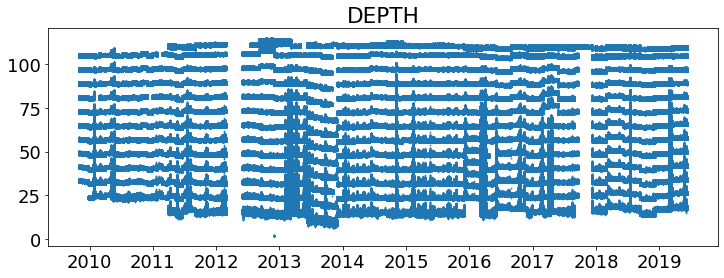

In [13]:
plt.figure(figsize=(12,4))
plt.scatter(temp_df.index, temp_df.DEPTH, s=0.5)
plt.title('DEPTH')

# plt.figure(figsize=(12,4))
# plt.scatter(temp_df.index, temp_df.PRES, s=0.5)
# plt.title('PRES')

# plt.figure(figsize=(12,4))
# plt.scatter(temp_df.index, temp_df.PRES_REL, s=0.5)
# plt.title('PRES_REL')

plt.show()

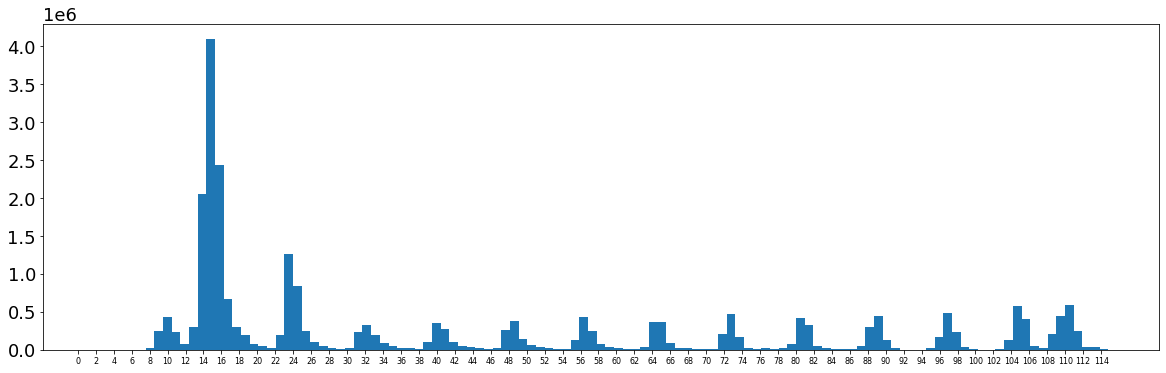

In [14]:
plt.figure(figsize=(20,6))
plt.hist(temp_df.DEPTH, bins=117)
plt.xticks(np.arange(0,116,2))
plt.tick_params(axis='x', which='major', labelsize=8)

In [15]:
np.arange(19, 115, step=5)

array([ 19,  24,  29,  34,  39,  44,  49,  54,  59,  64,  69,  74,  79,
        84,  89,  94,  99, 104, 109, 114])

In [30]:
# Max and min pressure values
bin_max = temp_df.DEPTH.max()
bin_min = temp_df.DEPTH.min()
bin_size = 1

In [31]:
def create_bins(bin_size, bin_max):
    """
    A function to return equal sized bins and corresponding bin labels for binning of data.
    Input:
    bin_size: size of bins
    bin_max: maximum value of the data to be binned. The minimum is assumed to be zero.
    """
    num_bins = np.ceil(bin_max/bin_size)
    lab_start = np.ceil(bin_size/2)
    bins = np.linspace(0, bin_size*num_bins, num_bins+1)
    labs = np.linspace(lab_start, bin_size*(num_bins-1)+lab_start, num_bins)
    return bins, labs

In [32]:
# Automatically calculate pressure bin parameters based on given bin_size
bins, labs = create_bins(bin_size, bin_max)
bins, labs

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.

In [33]:
# create a column with pressure bin labels
temp_df['DEPTH_BIN'] = pd.cut(temp_df.DEPTH, bins = bins, labels = labs)

In [34]:
# First groupby PRES_BIN column, then resample each group on hourly intervals and mean each resulting bin
# drop unncessary columns and nan rows after
temp_df = temp_df.groupby('DEPTH_BIN').resample('1D').mean().drop(columns=['DEPTH','DEPTH_BIN']).dropna()

In [35]:
temp_df

TEMP
DEPTH_BIN TIME                 
2.0       2012-11-28  20.759911
3.0       2012-11-28  20.770100
7.0       2013-09-14  17.935699
          2013-10-13  21.433701
          2013-10-14  21.461100
...                         ...
115.0     2013-02-27  13.429167
          2013-02-28  13.922308
          2013-03-01  15.005527
          2013-03-02  15.120000
          2013-03-04  13.990000

[111686 rows x 1 columns]

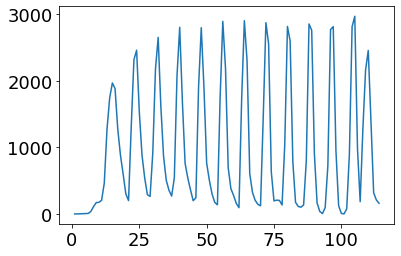

In [36]:
counts = temp_df.groupby('DEPTH_BIN').count()
plt.plot(counts)

In [37]:
c = counts.TEMP.values

In [38]:
# local maxima code from here https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array
optimal_depths = counts[np.r_[True, c[1:] > c[:-1]] & np.r_[c[:-1] > c[1:], True]]
optimal_depths.drop(77, inplace=True)

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
np.diff(optimal_depths.index)

array([9., 8., 8., 8., 8., 8., 8., 8., 8., 9., 8., 5.])

In [52]:
optimal_depths = optimal_depths.index.values.codes # lower bound of 1m bin
optimal_depths

array([ 15,  24,  32,  40,  48,  56,  64,  72,  80,  88,  97, 105, 110],
      dtype=int8)

In [53]:
bins = np.unique(np.sort(np.concatenate(((optimal_depths - 2), (optimal_depths + 3)))))
bins_df = pd.DataFrame(data = {'bins': bins})
labs = bins_df.rolling(window=2).mean().bins.values[1:]
bins, labs

(array([ 13,  18,  22,  27,  30,  35,  38,  43,  46,  51,  54,  59,  62,
         67,  70,  75,  78,  83,  86,  91,  95, 100, 103, 108, 113],
       dtype=int8),
 array([ 15.5,  20. ,  24.5,  28.5,  32.5,  36.5,  40.5,  44.5,  48.5,
         52.5,  56.5,  60.5,  64.5,  68.5,  72.5,  76.5,  80.5,  84.5,
         88.5,  93. ,  97.5, 101.5, 105.5, 110.5]))

In [48]:
# create pd dataframe from scratch
data  = {'TIME': temp.TIME.values,
         'TEMP': temp.TEMP.values,
         'DEPTH':temp.DEPTH.values,
#          'PRES': temp.PRES.values,
#          'PRES_REL': temp.PRES_REL.values
        }

temp_df= pd.DataFrame(data, columns = ['TIME','TEMP','DEPTH'])#,'PRES','PRES_REL'])
# set TIME as the indexing variable
temp_df = temp_df.set_index('TIME')

In [54]:
# create a column with pressure bin labels
temp_df['DEPTH_BIN'] = pd.cut(temp_df.DEPTH, bins = bins, labels = labs)

In [55]:
# First groupby PRES_BIN column, then resample each group on hourly intervals and mean each resulting bin
# drop unncessary columns and nan rows after
temp_df = temp_df.groupby('DEPTH_BIN').resample('1D').mean().dropna()

In [56]:
temp_df

TEMP       DEPTH
DEPTH_BIN TIME                             
15.5      2011-03-30  23.974564   17.245085
          2011-03-31  23.710714   16.143826
          2011-04-01  23.332129   15.864942
          2011-04-02  22.782129   15.848205
          2011-04-03  22.812040   15.900038
...                         ...         ...
110.5     2019-06-08  17.637552  109.386749
          2019-06-09  17.738697  109.398209
          2019-06-10  17.839249  109.405907
          2019-06-11  17.778112  109.414391
          2019-06-12  17.930275  108.859344

[46218 rows x 2 columns]

In [57]:
temp_df.groupby('DEPTH_BIN').count()

,TEMP,DEPTH
DEPTH_BIN,,
15.5,2596,2596
20.0,992,992
24.5,3205,3205
28.5,644,644
32.5,3277,3277
36.5,633,633
40.5,3225,3225
44.5,595,595
48.5,3216,3216


In [58]:
temp_df_245 = temp_df.xs(24.5)

In [21]:
with open("../data/temp_df_245_original.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245, pickle_in)

NameError: name 'temp_df_245' is not defined

In [31]:
temp_df_245.DEPTH.min(), temp_df_245.DEPTH.max()

(22.012756, 26.95453)

In [32]:
temp_df_245

,TEMP,DEPTH
TIME,,
2009-12-23,19.442522,23.729443
2009-12-24,18.526331,23.694855
2009-12-25,19.328674,23.695995
2009-12-26,20.563595,23.792873
2009-12-27,20.583179,23.702913
...,...,...
2019-06-08,20.957422,26.174713
2019-06-09,20.641022,26.241486
2019-06-10,20.401205,26.195374


In [59]:
clim = temp_df_245.groupby([temp_df_245.index.month, temp_df_245.index.day]).mean()
clim = clim.TEMP.rolling(15).mean()
clim.index = np.arange(1, len(clim)+1, 1)

Text(0, 0.5, 'Temperature (degrees celsius)')

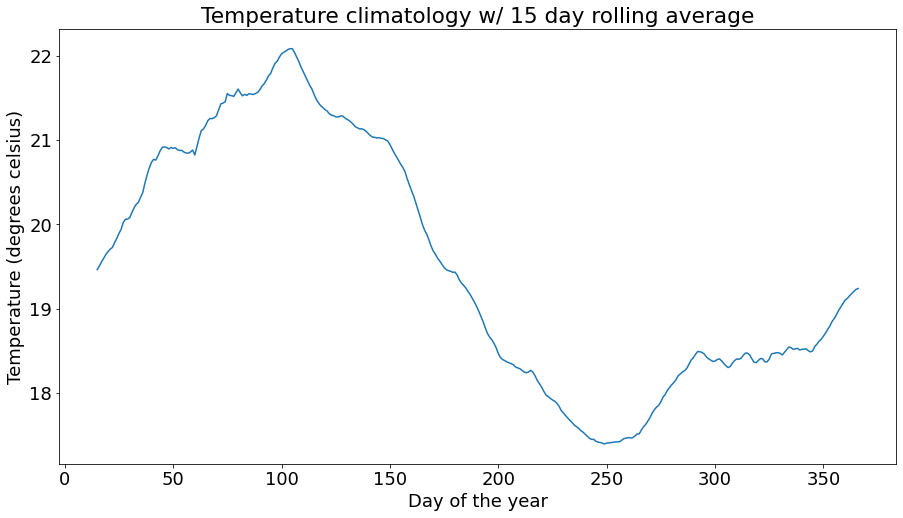

In [60]:
plt.figure(figsize=(15,8))
plt.plot(clim.index, clim)
plt.title("Temperature climatology w/ 15 day rolling average")
plt.xlabel("Day of the year")
plt.ylabel("Temperature (degrees celsius)")

Text(0, 0.5, 'Temperature (degrees celsius)')

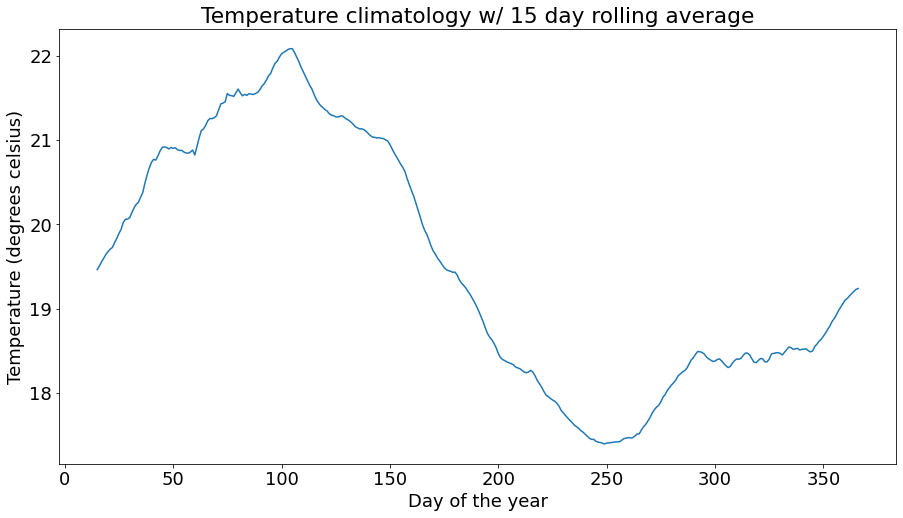

In [35]:
plt.figure(figsize=(15,8))
plt.plot(clim.index, clim)
plt.title("Temperature climatology w/ 15 day rolling average")
plt.xlabel("Day of the year")
plt.ylabel("Temperature (degrees celsius)")

In [61]:
temp_df_245_wgaps = temp_df_245.copy()
temp_df_245_wgaps = temp_df_245_wgaps.asfreq(freq='1D')

In [64]:
temp_df_245_wgaps

,TEMP,DEPTH
TIME,,
2009-12-23,19.442522,23.729443
2009-12-24,18.526331,23.694855
2009-12-25,19.328674,23.695995
2009-12-26,20.563595,23.792873
2009-12-27,20.583179,23.702913
...,...,...
2019-06-08,20.957422,26.174713
2019-06-09,20.641022,26.241486
2019-06-10,20.401205,26.195374


In [63]:
with open("../data/temp_depth_gapfilling/temp_df_245_original.pickle", "rb") as pickle_in:
    temp_df_245_wgaps = pickle.load(pickle_in).asfreq('1d')

Text(0.5, 0, 'Time (years)')

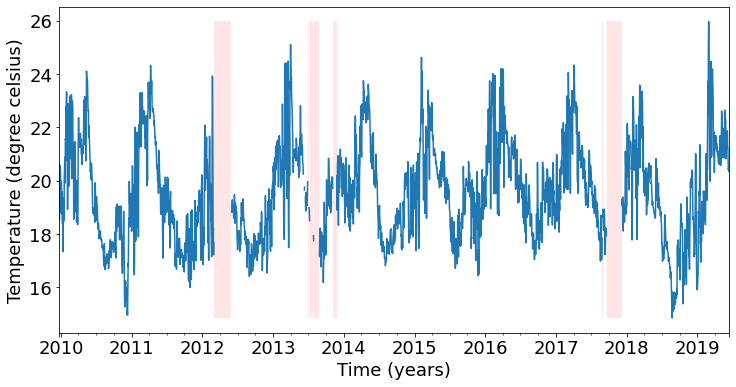

In [65]:
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_wgaps.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [10]:
def gap_loc_and_len(sample):
    tmp = 0
    loc = []
    leng = []
    for i in range(len(sample)):
        current=sample[i]
        if not(np.isnan(current)) and tmp>0:
            leng.append(tmp)
            tmp=0
        if np.isnan(current):
            if (tmp==0) : loc.append(i)
            tmp=tmp+1
    df = pd.DataFrame({'location': loc,
                       'length': leng})
    return(df)

In [11]:
gaps = gap_loc_and_len(temp_df_245_wgaps.TEMP.values)

In [12]:
gaps

,location,length
0,799,91
1,1262,4
2,1268,3
3,1284,6
4,1294,19
5,1315,29
6,1414,21
7,2805,2
8,2827,79


## Models

In [6]:
class descaled_mape(keras.losses.Loss):
    """
    A loss/metric that (de)scales true and predicted values into absolute units before calculating mean absolute percentage error (mape).
    Args:
        mu: mean (usually training data mean)
        sd: standard dev (usually based on training data)
        reduction: Type of tf.keras.losses.Reduction to apply to loss.
        name: name of loss function
    """
    def __init__(self, mu, sd, reduction=keras.losses.Reduction.AUTO, name='descaled_mape'):
        super().__init__(reduction=reduction, name=name)
        self.mu=mu
        self.sd=sd
    
    def call(self, y_true, y_pred):
        y_true = y_true * self.sd + self.mu
        y_pred = y_pred * self.sd + self.mu
        return tf.math.reduce_mean(tf.abs((y_true - y_pred)/y_true))
    
def gap_loc_and_len(sample):
    tmp = 0
    loc = []
    leng = []
    for i in range(len(sample)):
        current=sample[i]
        if not(np.isnan(current)) and tmp>0:
            leng.append(tmp)
            tmp=0
        if np.isnan(current):
            if (tmp==0) : loc.append(i)
            tmp=tmp+1
    df = pd.DataFrame({'location': loc,
                       'length': leng})
    return(df)

def gapfill(samp, lstm_model, train_mean, train_std, hist_len, pred_len, gaps = pd.DataFrame(), scale=True):
    if gaps.empty: gaps = gap_loc_and_len(samp.TEMP)
    for i in range(len(gaps)):
        gap_start = gaps.location[i]
        gap_length = gaps.length[i]
        hist_end = gap_start
        if gap_start < hist_len:
            hist_start = 0
        else:
            hist_start = gap_start - hist_len
        if ((gap_start >= hist_len) and (not np.any(np.isnan(samp.TEMP[hist_start: hist_end]))) and (gap_length <= pred_len)):
            # create history array of shape (1, 30, 1) ending at gap_start
            history = np.reshape(samp.TEMP.values[:gap_start][-hist_len:], (1,hist_len,1))
            # scale history
            if (scale): history = (history - train_mean)/train_std
            # use model to predict based on history and fill in sample gap
            # descale model output
            out = lstm_model.predict(history)[0,:gap_length]
            if (scale): out = out * train_std + train_mean
            samp.TEMP[gap_start : (gap_start + gap_length)] = out
    return samp

In [7]:
# callbacks
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('loss: {:7.4f}, val_loss: {:7.4f}' .format(logs['loss'], logs['val_loss']))
    print('.', end='')
    # Create a callback that saves the model's weights
    
# early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20) # original model patience: 20 # dropout models patience: 40

In [53]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 30
targ_len = 6

In [54]:
Time_diff = temp_df_245.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245))
window_len = hist_len + targ_len

In [61]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [20]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
   
train_data.shape[0]

2217

In [64]:
BATCH_SIZE = 8
BUFFER_SIZE = data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist30_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [65]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0464, val_loss:  0.0411
..........loss:  0.0325, val_loss:  0.0335
..........loss:  0.0298, val_loss:  0.0319
..........loss:  0.0260, val_loss:  0.0295
..........loss:  0.0231, val_loss:  0.0270
..........loss:  0.0213, val_loss:  0.0252
..........loss:  0.0190, val_loss:  0.0223
..........loss:  0.0177, val_loss:  0.0213
..........loss:  0.0162, val_loss:  0.0202
..........loss:  0.0148, val_loss:  0.0197
..........loss:  0.0139, val_loss:  0.0192
..........loss:  0.0132, val_loss:  0.0183
..........loss:  0.0128, val_loss:  0.0177
..........loss:  0.0122, val_loss:  0.0171
..........loss:  0.0117, val_loss:  0.0167
..........loss:  0.0113, val_loss:  0.0165
..........loss:  0.0108, val_loss:  0.0157
..........loss:  0.0106, val_loss:  0.0163
..........loss:  0.0104, val_loss:  0.0165
..........loss:  0.0101, val_loss:  0.0164
..........loss:  0.0099, val_loss:  0.0154
..........loss:  0.0095, val_loss:  0.0157
..........loss:  0.0094, val_loss:  0.0156
..........loss:  0.00

In [68]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/saved_modelsbidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5')

In [13]:
with open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "rb") as pickle_in:
    history = pickle.load(pickle_in)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.046389,0.046389,0.503371,0.456173,180.478424,0.041115,0.041115,0.451710,0.380623,218.453384
1,0.038901,0.038952,0.419827,0.322743,169.771820,0.038449,0.038449,0.421500,0.349264,170.948090
2,0.037892,0.037824,0.409279,0.315366,161.182953,0.037432,0.037432,0.409094,0.333721,184.168747
3,0.036946,0.036988,0.398621,0.300242,154.599670,0.036822,0.036822,0.403294,0.329482,191.314621
4,0.036333,0.036442,0.391941,0.295296,155.266846,0.036031,0.036031,0.393374,0.307536,156.309799
...,...,...,...,...,...,...,...,...,...,...
254,0.008846,0.008850,0.094819,0.020816,47.289871,0.015298,0.015298,0.166944,0.061358,64.059784
255,0.008901,0.008887,0.095488,0.020532,45.497074,0.015551,0.015551,0.169544,0.064041,69.285912
256,0.008814,0.008811,0.094472,0.020361,46.175190,0.015330,0.015330,0.166805,0.060356,68.466240
257,0.008654,0.008664,0.092842,0.019727,44.685219,0.014834,0.014834,0.161969,0.059860,65.846199


In [46]:
history

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.046389,0.046389,0.503371,0.456173,180.478424,0.041115,0.041115,0.451710,0.380623,218.453384
1,0.038901,0.038952,0.419827,0.322743,169.771820,0.038449,0.038449,0.421500,0.349264,170.948090
2,0.037892,0.037824,0.409279,0.315366,161.182953,0.037432,0.037432,0.409094,0.333721,184.168747
3,0.036946,0.036988,0.398621,0.300242,154.599670,0.036822,0.036822,0.403294,0.329482,191.314621
4,0.036333,0.036442,0.391941,0.295296,155.266846,0.036031,0.036031,0.393374,0.307536,156.309799
...,...,...,...,...,...,...,...,...,...,...
254,0.008846,0.008850,0.094819,0.020816,47.289871,0.015298,0.015298,0.166944,0.061358,64.059784
255,0.008901,0.008887,0.095488,0.020532,45.497074,0.015551,0.015551,0.169544,0.064041,69.285912
256,0.008814,0.008811,0.094472,0.020361,46.175190,0.015330,0.015330,0.166805,0.060356,68.466240
257,0.008654,0.008664,0.092842,0.019727,44.685219,0.014834,0.014834,0.161969,0.059860,65.846199


In [75]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled = temp_df_245_wgaps.copy()
temp_df_245_filled = gapfill(temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [79]:
# Save Model 1 filled ts
pickle_out = open("../data/temp_depth_gapfilling/temp_df_245_filled.pickle", "wb")
pickle.dump(temp_df_245_filled, pickle_out)
pickle_out.close()

In [78]:
gaps = gap_loc_and_len(temp_df_245_filled.TEMP.values)
gaps

,location,length
0,799,91
1,1294,19
2,1315,29
3,1414,21
4,2827,79


In [80]:
# Model 2
# History: 91 days Prediction: 91 days

# Training and validation data preparation
# drop nans
temp_df_245_filled.dropna(inplace=True)

In [81]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 30
targ_len = 30

In [82]:
Time_diff = temp_df_245_filled.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245_filled))
window_len = hist_len + targ_len

In [83]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245_filled.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245_filled.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [21]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
    
train_data.shape[0]

2130

In [94]:
BATCH_SIZE = 8
BUFFER_SIZE = data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ30_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(30)
])
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist30_targ30_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [95]:
# Model 2 training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
history = bidirectional_lstm_targ30_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0610, val_loss:  0.0517
..........loss:  0.0399, val_loss:  0.0394
..........loss:  0.0330, val_loss:  0.0332
..........loss:  0.0286, val_loss:  0.0295
..........loss:  0.0254, val_loss:  0.0262
..........loss:  0.0234, val_loss:  0.0243
..........loss:  0.0218, val_loss:  0.0228
..........loss:  0.0208, val_loss:  0.0220
..........loss:  0.0197, val_loss:  0.0214
..........loss:  0.0188, val_loss:  0.0208
..........loss:  0.0187, val_loss:  0.0201
..........loss:  0.0182, val_loss:  0.0195
..........loss:  0.0179, val_loss:  0.0191
..........loss:  0.0173, val_loss:  0.0190
..........loss:  0.0170, val_loss:  0.0185
..........loss:  0.0169, val_loss:  0.0182
..........loss:  0.0165, val_loss:  0.0182
..........loss:  0.0163, val_loss:  0.0178
..........loss:  0.0165, val_loss:  0.0178
..........loss:  0.0162, val_loss:  0.0177
..........loss:  0.0159, val_loss:  0.0177
..........loss:  0.0158, val_loss:  0.0175
..........loss:  0.0157, val_loss:  0.0176
..........loss:  0.01

In [96]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ30_model.save('../data/temp_depth_gapfilling/saved_modelsbidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5')

In [47]:
with open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "rb") as pickle_in:
    history = pickle.load(pickle_in)

In [48]:
history

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.061007,0.061007,0.647872,0.674580,230.703506,0.051651,0.051651,0.558355,0.518314,369.519409
1,0.050854,0.050819,0.547151,0.506067,303.919189,0.049331,0.049331,0.527223,0.465462,346.955383
2,0.048073,0.048067,0.517654,0.465853,281.125366,0.047912,0.047912,0.515489,0.459582,385.324768
3,0.046801,0.046878,0.502165,0.438672,260.824982,0.047409,0.047409,0.512546,0.461327,359.856628
4,0.045282,0.045335,0.485196,0.409847,245.785782,0.044595,0.044595,0.474663,0.400345,233.828125
...,...,...,...,...,...,...,...,...,...,...
322,0.014466,0.014480,0.154230,0.057207,157.788712,0.016505,0.016505,0.174724,0.068254,251.761032
323,0.014391,0.014377,0.153522,0.056700,140.074860,0.016605,0.016605,0.175765,0.067973,235.936951
324,0.014553,0.014540,0.155021,0.057964,147.409698,0.016435,0.016435,0.174056,0.067466,228.282394
325,0.014544,0.014520,0.155067,0.057512,166.029541,0.016617,0.016617,0.175830,0.069281,263.171478


In [99]:
# add gaps represented by nans 
temp_df_245_filled = temp_df_245_filled.asfreq(freq="1D")
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_2 = temp_df_245_filled.copy()
temp_df_245_filled_2 = gapfill(temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [101]:
# Save Model 1 filled ts
pickle_out = open("../data/temp_depth_gapfilling/temp_df_245_filled_2.pickle", "wb")
pickle.dump(temp_df_245_filled_2, pickle_out)
pickle_out.close()

In [100]:
gaps = gap_loc_and_len(temp_df_245_filled_2.TEMP.values)
gaps

,location,length
0,799,91
1,2827,79


In [42]:
# load Model 2 filled timeseries
pickle_in = open("../data/temp_depth_gapfilling/temp_df_245_filled_2.pickle", "rb")
temp_df_245_filled_2 = pickle.load(pickle_in)
pickle_in.close()

In [43]:
## Model 3
# History: 181 days prediction: 181 days

# Training and validation data preparation
# drop nans
temp_df_245_filled_2.dropna(inplace=True)

In [44]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 91
targ_len = 91

In [45]:
Time_diff = temp_df_245_filled_2.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245_filled_2))
window_len = hist_len + targ_len

In [46]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245_filled_2.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245_filled_2.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [22]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
    
train_data.shape[0] 

1793

In [50]:
BATCH_SIZE = 8
BUFFER_SIZE = data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [51]:
# Model 3 training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
history = bidirectional_lstm_targ91_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0750, val_loss:  0.0677
..........loss:  0.0461, val_loss:  0.0466
..........loss:  0.0423, val_loss:  0.0414
..........loss:  0.0432, val_loss:  0.0442
..........loss:  0.0376, val_loss:  0.0379
..........loss:  0.0344, val_loss:  0.0354
..........loss:  0.0433, val_loss:  0.0444
..........loss:  0.0458, val_loss:  0.0462
..

In [52]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/saved_modelsbidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [59]:
history_df = pd.DataFrame(history.history)
history_df

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.074977,0.074977,0.800861,1.336559,151.668854,0.067656,0.067656,0.729749,0.836428,156.280609
1,0.059618,0.059583,0.640942,0.667631,181.339951,0.056665,0.056665,0.610568,0.619365,188.430771
2,0.053924,0.053934,0.578970,0.561069,194.515442,0.053632,0.053632,0.570884,0.545226,178.242004
3,0.052029,0.052000,0.556882,0.518419,192.059174,0.052683,0.052683,0.562303,0.530588,187.538467
4,0.050975,0.051067,0.544079,0.493711,190.653778,0.051993,0.051993,0.550157,0.506825,170.681351
...,...,...,...,...,...,...,...,...,...,...
67,0.047485,0.047494,0.510532,0.479060,188.947128,0.047464,0.047464,0.510676,0.482235,183.485703
68,0.046143,0.046134,0.494421,0.454962,178.461853,0.047530,0.047530,0.509094,0.474083,187.224289
69,0.045625,0.045656,0.489051,0.449176,177.323837,0.046956,0.046956,0.508621,0.491103,187.878036
70,0.045849,0.045919,0.492557,0.457411,179.644943,0.046205,0.046205,0.500110,0.470987,193.841431


In [53]:
# add gaps represented by nans 
temp_df_245_filled_2 = temp_df_245_filled_2.asfreq(freq="1D")
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

In [54]:
temp_df_245_filled_3

,TEMP,DEPTH
TIME,,
2009-12-23,19.442522,23.729443
2009-12-24,18.526331,23.694855
2009-12-25,19.328674,23.695995
2009-12-26,20.563595,23.792873
2009-12-27,20.583179,23.702913
...,...,...
2019-06-08,20.957422,26.174713
2019-06-09,20.641022,26.241486
2019-06-10,20.401205,26.195374


In [58]:
gaps = gap_loc_and_len(temp_df_245_filled_3.TEMP.values)
gaps

,location,length


Model 3 with additional layer

In [53]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [58]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
#     layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
#     layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True)),
#     layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist91_targ91_4layers_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [59]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ91_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  2.4389, val_loss:  0.0590
..........loss:  0.0396, val_loss:  0.0416
..........loss:  0.0363, val_loss:  0.0369
..........loss:  0.0393, val_loss:  0.0405
..........

In [60]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,2.438897,2.438897,73.738274,3.581348e+06,377.850006,0.059019,0.059019,1.790962,4.723829,9.139041
1,0.053298,0.053390,1.630390,4.062994e+00,8.215914,0.052712,0.052712,1.586697,3.710784,8.198941
2,0.050990,0.050906,1.558971,3.758763e+00,7.862494,0.049420,0.049420,1.528484,3.653142,7.573950
3,0.049180,0.049347,1.503404,3.492692e+00,7.583866,0.050782,0.050782,1.587509,4.057802,7.733910
4,0.047461,0.047422,1.452248,3.343765e+00,7.314318,0.043276,0.043276,1.335096,2.865062,6.641623
5,0.043199,0.043213,1.320223,2.838578e+00,6.662169,0.042187,0.042187,1.274743,2.571174,6.546710
6,0.042480,0.042454,1.296903,2.754203e+00,6.554100,0.041641,0.041641,1.261444,2.548585,6.452639
7,0.042262,0.042353,1.288666,2.715811e+00,6.524417,0.041242,0.041242,1.273536,2.665529,6.324765
8,0.041298,0.041384,1.261061,2.604449e+00,6.370623,0.039314,0.039314,1.203472,2.352186,6.058799
9,0.040243,0.040205,1.226952,2.473566e+00,6.213400,0.039844,0.039844,1.210723,2.376769,6.165607


In [61]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5')

Filling with 4 layer model

In [94]:
with open("../data/temp_depth_gapfilling/temp_df_245_filled_2.pickle", "rb") as pickle_in:
    temp_df_245_filled_2 = pickle.load(pickle_in)
# add gaps represented by nans 
temp_df_245_filled_2 = temp_df_245_filled_2.asfreq(freq="1D")
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91, scale=False)

In [63]:
temp_df_245_filled_3

,TEMP,DEPTH
TIME,,
2009-12-23,19.442522,23.729443
2009-12-24,18.526331,23.694855
2009-12-25,19.328674,23.695995
2009-12-26,20.563595,23.792873
2009-12-27,20.583179,23.702913
...,...,...
2019-06-08,20.957422,26.174713
2019-06-09,20.641022,26.241486
2019-06-10,20.401205,26.195374


In [95]:
gaps = gap_loc_and_len(temp_df_245_filled_3.TEMP.values)
gaps

,location,length


In [96]:
# Save Model 1 filled ts
pickle_out = open("../data/temp_depth_gapfilling/temp_df_245_filled_3.pickle", "wb")
pickle.dump(temp_df_245_filled_3, pickle_out)
pickle_out.close()

Text(0.5, 0, 'Time (years)')

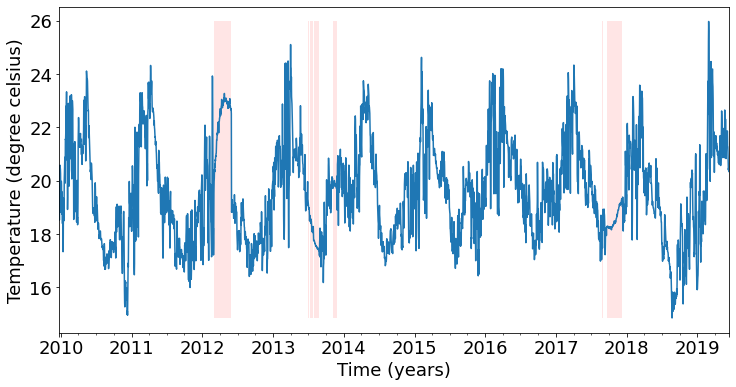

In [57]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Text(0.5, 0, 'Time (years)')

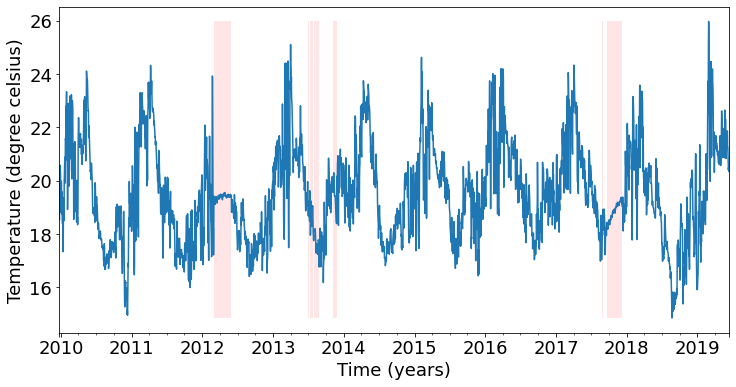

In [97]:
####################
# Below plot is based on the four layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Backwards prediction

In [66]:
#load model 3
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/saved_models/saved_modelsbidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [81]:
with open("../data/temp_depth_gapfilling/temp_df_245_filled_2.pickle", "rb") as pickle_in:
    temp_df_245_filled_2 = pickle.load(pickle_in)
# add gaps represented by nans 
temp_df_245_filled_2 = temp_df_245_filled_2.asfreq(freq="1D")
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()[::-1]
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

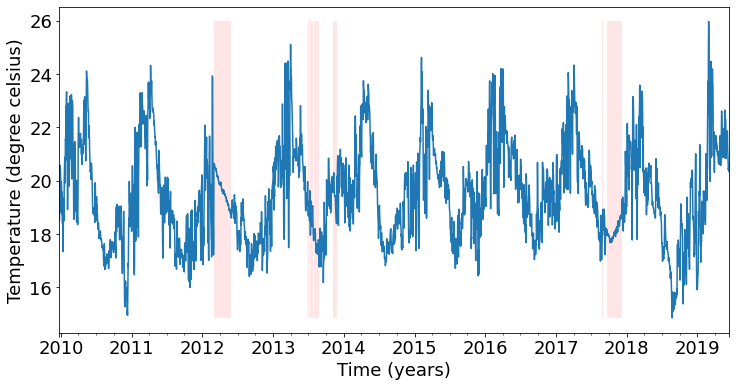

In [82]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

### Testing model 1 with hist=6

In [98]:
temp_df_245 = temp_df_245_wgaps.copy()
temp_df_245.dropna(inplace=True)

In [101]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 6
targ_len = 6

In [102]:
Time_diff = temp_df_245.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245))
window_len = hist_len + targ_len

In [103]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist6_targ6.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [104]:
BATCH_SIZE = 8
BUFFER_SIZE = data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist6_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [105]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0429, val_loss:  0.0349
..........loss:  0.0356, val_loss:  0.0345
..........loss:  0.0337, val_loss:  0.0329
..........loss:  0.0330, val_loss:  0.0322
..........loss:  0.0331, val_loss:  0.0325
..........loss:  0.0323, val_loss:  0.0321
..

In [106]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist6_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/saved_models/bidirectional_lstm_model_hist6_targ6_loss-descaledmape.h5')

In [107]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.042925,0.042925,0.467504,0.416275,225.751938,0.034877,0.034877,0.385723,0.291973,173.401230
1,0.036507,0.036501,0.398805,0.316332,251.334534,0.034847,0.034847,0.385500,0.289494,175.343689
2,0.036411,0.036409,0.397442,0.315061,254.333908,0.035277,0.035277,0.389010,0.295978,180.290573
3,0.035996,0.035974,0.392466,0.308963,249.082825,0.035788,0.035788,0.389953,0.272621,159.004669
4,0.035984,0.035992,0.392707,0.308728,229.136597,0.034372,0.034372,0.378294,0.276094,177.977081
5,0.035830,0.035833,0.390628,0.306950,248.591858,0.035746,0.035746,0.393832,0.287408,144.689880
6,0.036010,0.036041,0.392884,0.310598,250.281860,0.034298,0.034298,0.377953,0.276811,167.300735
7,0.035620,0.035607,0.388873,0.305664,229.374130,0.033853,0.033853,0.372600,0.269957,171.665955
8,0.035818,0.035804,0.389804,0.303566,245.602615,0.034585,0.034585,0.384414,0.293809,169.022552
9,0.035575,0.035593,0.388032,0.303303,226.275635,0.035303,0.035303,0.384879,0.266758,151.702103


### Testing model 1 with hist=15

In [108]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 15
targ_len = 6

In [109]:
Time_diff = temp_df_245.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245))
window_len = hist_len + targ_len

In [110]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist15_targ6.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [111]:
BATCH_SIZE = 8
BUFFER_SIZE = data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/bidirectional_lstm_daily_hist15_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [112]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0455, val_loss:  0.0369
..........loss:  0.0336, val_loss:  0.0309
..........loss:  0.0317, val_loss:  0.0298
..........loss:  0.0283, val_loss:  0.0290
..........loss:  0.0255, val_loss:  0.0276
..........loss:  0.0233, val_loss:  0.0265
..........loss:  0.0210, val_loss:  0.0257
..........loss:  0.0189, val_loss:  0.0251
..........loss:  0.0174, val_loss:  0.0252
..........loss:  0.0161, val_loss:  0.0234
..........loss:  0.0150, val_loss:  0.0235
..........loss:  0.0144, val_loss:  0.0227
..........loss:  0.0133, val_loss:  0.0225
..........loss:  0.0130, val_loss:  0.0219
..........loss:  0.0123, val_loss:  0.0215
..........loss:  0.0119, val_loss:  0.0223
..........loss:  0.0115, val_loss:  0.0209
..........loss:  0.0109, val_loss:  0.0209
..........loss:  0.0107, val_loss:  0.0207
....

In [113]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/bidirectional_lstm_model_hist15_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/saved_models/bidirectional_lstm_model_hist15_targ6_loss-descaledmape.h5')

In [114]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.045506,0.045506,0.491538,0.435256,161.781250,0.036906,0.036906,0.402786,0.286057,112.928413
1,0.038333,0.038333,0.418972,0.326247,163.797104,0.036431,0.036431,0.396349,0.281134,129.989700
2,0.037565,0.037564,0.409635,0.315365,164.387924,0.034543,0.034543,0.377400,0.261826,104.839111
3,0.036516,0.036515,0.398656,0.306672,155.997284,0.033771,0.033771,0.369509,0.259731,109.864922
4,0.035978,0.035973,0.392298,0.296064,157.756607,0.033390,0.033390,0.362470,0.253414,115.467117
...,...,...,...,...,...,...,...,...,...,...
179,0.010667,0.010668,0.115268,0.029087,53.561398,0.021128,0.021128,0.229143,0.103325,81.121803
180,0.010694,0.010694,0.115669,0.030459,55.520401,0.020743,0.020743,0.224542,0.098099,79.624268
181,0.010801,0.010802,0.116836,0.030111,57.249111,0.020859,0.020859,0.226366,0.100572,79.460457
182,0.010633,0.010632,0.115008,0.029435,52.165024,0.021572,0.021572,0.234432,0.104823,81.455093


### Testing model 1 without extra flare from the tensorflow timeseries forecasting tutorial 

In [132]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [133]:
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/simple/bidirectional_lstm_daily_hist30_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [134]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ6_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.4564, val_loss:  0.2814
..........loss:  0.0262, val_loss:  0.0265
..........loss:  0.0259, val_loss:  0.0280
..........loss:  0.0254, val_loss:  0.0245
..........loss:  0.0256, val_loss:  0.0276
..........loss:  0.0238, val_loss:  0.0267
..........loss:  0.0236, val_loss:  0.0251
..........loss:  0.0246, val_loss:  0.0258
..........loss:  0.0237, val_loss:  0.0239
..........loss:  0.0233, val_loss:  0.0252
..........loss:  0.0231, val_loss:  0.0242
..........loss:  0.0238, val_loss:  0.0235
..........loss:  0.0234, val_loss:  0.0251
........

In [135]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.456363,0.454785,13.875052,267.494720,70.573456,0.281378,0.281406,8.612626,172.548401,43.350979
1,0.191415,0.191095,5.825353,117.403175,29.591354,0.160673,0.160819,4.885802,87.163857,24.844349
2,0.133975,0.133830,4.076246,58.075710,20.715145,0.143019,0.142814,4.382752,30.258743,22.022886
3,0.228582,0.229904,6.961570,88.138359,35.318428,0.298340,0.298157,9.101353,138.521759,46.044136
4,0.187715,0.186293,5.699399,59.246052,29.052088,0.050773,0.050713,1.554341,3.623047,7.829117
...,...,...,...,...,...,...,...,...,...,...
123,0.023325,0.023321,0.714034,1.010591,3.596059,0.023348,0.023216,0.718292,1.077061,3.591180
124,0.022978,0.022960,0.703743,0.994985,3.541786,0.023629,0.023481,0.729306,1.113246,3.627902
125,0.023334,0.023329,0.714390,1.015747,3.597198,0.023353,0.023221,0.718291,1.072773,3.592664
126,0.023245,0.023280,0.711332,1.002753,3.584456,0.023416,0.023279,0.719428,1.069803,3.604311


In [136]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/simple/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5')

Model 2

In [182]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled = temp_df_245_wgaps.copy()
temp_df_245_filled = gapfill(temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [138]:
# Model 2
# Training and validation data preparation
# drop nans
temp_df_245_filled.dropna(inplace=True)

In [139]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 30
targ_len = 30

In [140]:
Time_diff = temp_df_245_filled.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245_filled))
window_len = hist_len + targ_len

In [141]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245_filled.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245_filled.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [142]:
bidirectional_lstm_targ30_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(30)
])
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/simple/bidirectional_lstm_daily_hist30_tar30_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [143]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ30_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0705, val_loss:  0.0644
..........loss:  0.0467, val_loss:  0.0483
..........loss:  0.0418, val_loss:  0.0429
..........loss:  0.0381, val_loss:  0.0405
..........loss:  0.0354, val_loss:  0.0371
..........loss:  0.0333, val_loss:  0.0351
..........loss:  0.0304, val_loss:  0.0329
..........loss:  0.0292, val_loss:  0.0317
..........loss:  0.0270, val_loss:  0.0302
..........loss:  0.0260, val_loss:  0.0295
..........loss:  0.0250, val_loss:  0.0288
..........loss:  0.0241, val_loss:  0.0279
..........loss:  0.0229, val_loss:  0.0270
..........loss:  0.0228, val_loss:  0.0266
..........loss:  0.0216, val_loss:  0.0256
..........loss:  0.0212, val_loss:  0.0249
..........loss:  0.0208, val_loss:  0.0240
..........loss:  0.0211, val_loss:  0.0239
..........loss:  0.0197, val_loss:  0.0232
..........loss:  0.0192, val_loss:  0.0228
..........loss:  0.0188, val_loss:  0.0227
..........loss:  0.0192, val_loss:  0.0223
..........loss:  0.0184, val_loss:  0.0220
..........loss:  0.01

In [144]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.070527,0.070622,0.748519,0.866577,133.786407,0.064441,0.063220,0.691780,0.762402,164.934418
1,0.058500,0.058567,0.626666,0.645321,184.869598,0.055195,0.054415,0.597080,0.597764,192.086227
2,0.052071,0.051976,0.560998,0.535192,201.654953,0.051660,0.051018,0.555649,0.527352,206.612457
3,0.049694,0.049712,0.536243,0.495436,200.561218,0.050359,0.049737,0.544156,0.506170,190.177917
4,0.048727,0.048778,0.525878,0.481107,198.473251,0.049609,0.048998,0.537087,0.503285,179.278534
...,...,...,...,...,...,...,...,...,...,...
415,0.015547,0.015557,0.165857,0.066566,81.250290,0.019775,0.019617,0.212104,0.097420,92.978096
416,0.015565,0.015528,0.166051,0.066644,81.807465,0.019828,0.019672,0.212548,0.097076,95.272018
417,0.015649,0.015692,0.166925,0.066869,81.774239,0.019986,0.019856,0.214166,0.096811,96.515900
418,0.015672,0.015689,0.167178,0.067102,80.394455,0.019788,0.019632,0.212361,0.098177,95.055916


In [145]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/simple/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ30_model.save('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5')

Model 3

In [184]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_2 = temp_df_245_filled.copy()
temp_df_245_filled_2 = gapfill(temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [159]:
# Model 2
# Training and validation data preparation
# drop nans
temp_df_245_filled_2.dropna(inplace=True)

In [160]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 91
targ_len = 91

In [161]:
Time_diff = temp_df_245_filled_2.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245_filled))
window_len = hist_len + targ_len

In [162]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = hist_len + targ_len
for w in range(len(break_index)):
    run_start = hist_len if w == 0 else break_index[w-1] + 1 + hist_len
    run_end = break_index[w] - targ_len   
    for i in range(run_start, run_end):
        indices = range(i-hist_len, i)
        data.append(np.reshape(temp_df_245_filled_2.TEMP.values[indices], (hist_len,1)))
        labels.append(temp_df_245_filled_2.TEMP.values[i:i+targ_len])        
data = np.array(data)
labels = np.array(labels)
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [169]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/simple/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [170]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0776, val_loss:  0.0776
..........loss:  0.0573, val_loss:  0.0553
..........loss:  0.0539, val_loss:  0.0541
..........loss:  0.0502, val_loss:  0.0509
..........loss:  0.0500, val_loss:  0.0500
..........loss:  0.0487, val_loss:  0.0499
..........loss:  0.0480, val_loss:  0.0489
..........loss:  0.0475, val_loss:  0.0482
..........loss:  0.0484, val_loss:  0.0493
..........loss:  0.0481, val_loss:  0.0487
..........loss:  0.0431, val_loss:  0.0449
..........loss:  0.0440, val_loss:  0.0443
..........loss:  0.0408, val_loss:  0.0428
..........loss:  0.0405, val_loss:  0.0420
..........loss:  0.0394, val_loss:  0.0412
..........loss:  0.0388, val_loss:  0.0413
..........loss:  0.0381, val_loss:  0.0400
..........loss:  0.0386, val_loss:  0.0400
..........loss:  0.0377, val_loss:  0.0395
..........loss:  0.0385, val_loss:  0.0403
..........loss:  0.0368, val_loss:  0.0391
..........loss:  0.0385, val_loss:  0.0403
..........loss:  0.0366, val_loss:  0.0389
......

In [171]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.077565,0.077177,0.823402,1.056643,111.995567,0.077648,0.072244,0.826315,1.021803,109.764153
1,0.074894,0.074453,0.799832,0.971057,123.446220,0.073814,0.069364,0.792565,0.974366,129.053986
2,0.071075,0.071455,0.765919,0.919903,151.431351,0.069414,0.065620,0.750827,0.903136,147.530655
3,0.070109,0.071081,0.756193,1.178616,176.664932,0.066538,0.063080,0.720596,0.845265,157.479156
4,0.064275,0.063213,0.695177,0.785035,176.671280,0.063073,0.059279,0.676678,0.754683,161.329620
...,...,...,...,...,...,...,...,...,...,...
221,0.036696,0.038137,0.388985,0.283684,176.810822,0.039856,0.037334,0.425677,0.331951,171.336075
222,0.037872,0.038887,0.403005,0.299809,186.327942,0.038805,0.036333,0.411550,0.314579,165.599030
223,0.036850,0.037354,0.391298,0.288449,177.361618,0.039088,0.036489,0.411572,0.320287,163.896652
224,0.037533,0.037367,0.397401,0.297083,180.106293,0.039479,0.037173,0.417783,0.326413,165.805328


In [172]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/simple/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [186]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

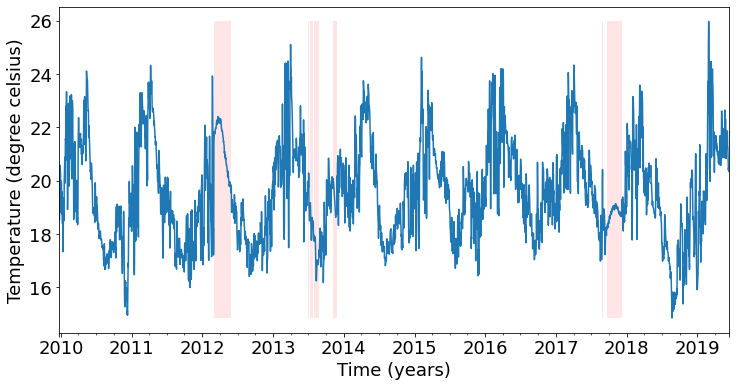

In [188]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [191]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()[::-1]
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

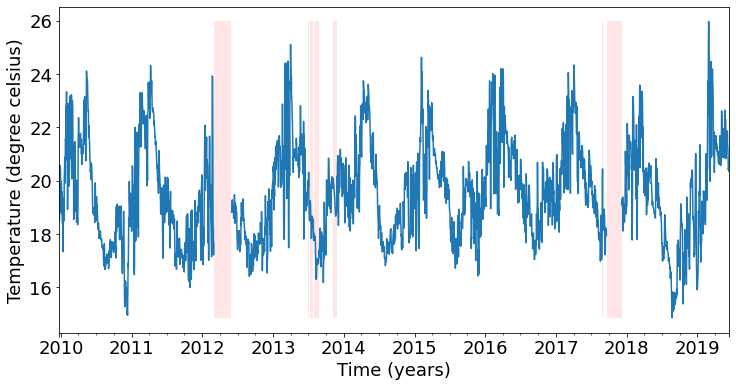

In [19]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_2.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

## Test model 3 with sequence after gap as a second feature variable

In [10]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [11]:
#load model 3
bidirectional_lstm_targ6_model = keras.models.load_model('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [12]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled = temp_df_245_wgaps.copy()
temp_df_245_filled = gapfill(temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [16]:
with open("../data/temp_depth_gapfilling/simple/temp_df_245_filled.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled, pickle_in)

In [17]:
#load model 3
bidirectional_lstm_targ30_model = keras.models.load_model('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [18]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_2 = temp_df_245_filled.copy()
temp_df_245_filled_2 = gapfill(temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [15]:
with open("../data/temp_depth_gapfilling/simple/temp_df_245_filled_2.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_2, pickle_in)

In [16]:
# Model 3
# Training and validation data preparation
# drop nans
temp_df_245_filled_2.dropna(inplace=True)

In [17]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 91
targ_len = 91

In [18]:
Time_diff = temp_df_245_filled_2.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245_filled))
window_len = hist_len + targ_len

In [41]:
temp_df_245_filled_2.TEMP.values[797:800, np.newaxis]

array([[17.218676],
       [17.668772],
       [18.820358]], dtype=float32)

In [48]:
np.hstack([temp_df_245_filled_2.TEMP.values[797:800, np.newaxis], temp_df_245_filled_2.TEMP.values[799:796:-1, np.newaxis]])

array([[17.218676, 18.820358],
       [17.668772, 17.668772],
       [18.820358, 17.218676]], dtype=float32)

In [55]:
[i for i in range(-20)]

[]

In [81]:
data = []
labels = []
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1 
window_len = 2*hist_len + targ_len
for w in range(len(break_index)):
    run_len = break_index[w] if w == 0 else break_index[w] - break_index[w-1]
    for i in range(run_len - window_len + 1):
        run_start = i if w==0 else break_index[w-1] + 1 + i
        indices = range(i-hist_len, i)
        data.append(np.hstack([temp_df_245_filled_2.TEMP.values[run_start:(run_start+hist_len), np.newaxis], 
                               temp_df_245_filled_2.TEMP.values[(run_start+2*hist_len+targ_len-1):(run_start+hist_len+targ_len-1):-1, np.newaxis]]))
        labels.append(temp_df_245_filled_2.TEMP.values[(run_start+hist_len):(run_start+hist_len+targ_len)])        
data = np.array(data)
labels = np.array(labels)

In [100]:
train_data.shape

(2217, 30, 1)

In [59]:
# Split into training and test datasets
trainidx = np.random.choice(len(data), int(np.round(0.9*len(data))), replace=False)
train_data = data[trainidx]
train_labels = labels[trainidx]
train_labels = train_labels.reshape((len(train_labels),targ_len))
val_data = np.delete(data, obj=trainidx, axis=0)
val_labels = np.delete(labels, trainidx, axis=0)
val_labels = val_labels.reshape((len(val_labels), targ_len))
# Normalisation
train_mean = train_data.mean()
train_std = train_data.std()
# save training, validation and normalisation data
pickle_out = open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "wb")
pickle.dump([train_mean, train_std, train_data, train_labels, val_data, val_labels], pickle_out)
pickle_out.close()
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [65]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/simple/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [66]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0770, val_loss:  0.0738
..........loss:  0.0437, val_loss:  0.0437
..........loss:  0.0390, val_loss:  0.0398
..........loss:  0.0365, val_loss:  0.0364
..........loss:  0.0341, val_loss:  0.0341
..........loss:  0.0327, val_loss:  0.0324
..........loss:  0.0320, val_loss:  0.0320
..........loss:  0.0308, val_loss:  0.0310
..........loss:  0.0301, val_loss:  0.0306
..........loss:  0.0297, val_loss:  0.0302
..........loss:  0.0291, val_loss:  0.0297
..........loss:  0.0318, val_loss:  0.0305
..........loss:  0.0293, val_loss:  0.0292
..........loss:  0.0284, val_loss:  0.0289
..........loss:  0.0280, val_loss:  0.0283
..........loss:  0.0278, val_loss:  0.0282
..........loss:  0.0276, val_loss:  0.0278
..........loss:  0.0275, val_loss:  0.0278
..........loss:  0.0273, val_loss:  0.0276
..........loss:  0.0271, val_loss:  0.0273
..........loss:  0.0268, val_loss:  0.0270
..........loss:  0.0271, val_loss:  0.0273
..........loss:  0.0264, val_loss:  0.0267
..........loss:  0.02

In [67]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.077033,0.077046,0.819191,0.995661,115.425613,0.073819,0.072408,0.785743,0.931180,132.281448
1,0.073554,0.073342,0.785553,0.949991,143.034164,0.069291,0.068041,0.740007,0.854588,155.469086
2,0.066627,0.066635,0.712456,0.802079,170.011047,0.061943,0.061113,0.664133,0.723374,197.256851
3,0.062145,0.061786,0.664015,0.734338,198.850388,0.058405,0.057660,0.625227,0.620999,184.652481
4,0.056443,0.056646,0.602821,0.577144,192.476730,0.053783,0.053231,0.575249,0.529754,199.360397
...,...,...,...,...,...,...,...,...,...,...
495,0.023395,0.023338,0.249420,0.135477,117.592651,0.023536,0.023605,0.250509,0.133516,118.319817
496,0.023370,0.023300,0.249081,0.135429,116.448372,0.023587,0.023659,0.250933,0.134911,117.588615
497,0.023379,0.023380,0.249189,0.135578,117.678711,0.023627,0.023687,0.251276,0.134002,118.473518
498,0.023392,0.023308,0.249292,0.135871,117.021065,0.023643,0.023703,0.251875,0.133771,117.274574


In [68]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/simple/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [20]:
temp_df_245_filled_2 = temp_df_245_filled_2.asfreq('1D')
gap_loc_and_len(temp_df_245_filled_2.TEMP)

,location,length
0,799,91
1,2827,79


In [21]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [27]:
#load model 3
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/simple/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [52]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
    

Text(0.5, 0, 'Time (years)')

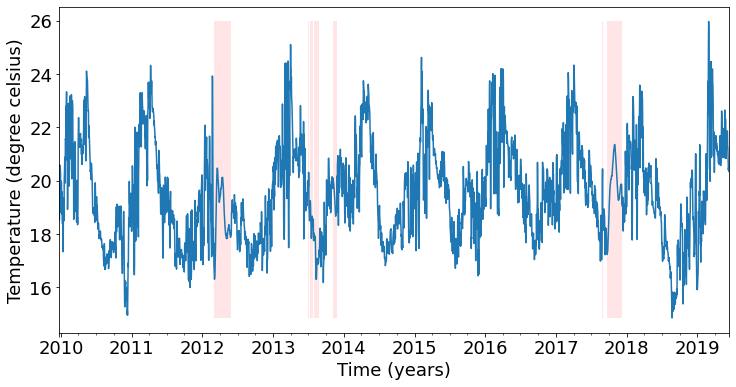

In [53]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
samp.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

# Test number of layers and nodes

## Single layer

In [53]:
# Model 1 to fill in gaps up to 10 days long
hist_len = 30
targ_len = 6

In [54]:
Time_diff = temp_df_245.index.to_series().diff()
break_index = np.where(Time_diff > pd.Timedelta(days=1))[0] - 1
break_index = np.append(break_index, len(temp_df_245))
window_len = hist_len + targ_len

In [49]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [62]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=train_data.shape[-2:])),
#     layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
#     layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/test_layers_nodes_dropout/bidirectional_lstm_daily_hist30_targ6_1-64nodelayer_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [63]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1739, val_loss:  0.0349
..........loss:  0.0235, val_loss:  0.0248
..........loss:  0.0228, val_loss:  0.0247
..........loss:  0.0223, val_loss:  0.0232
..........loss:  0.0224, val_loss:  0.0224
..........loss:  0.0222, val_loss:  0.0240
..........loss:  0.0218, val_loss:  0.0219
..........loss:  0.0218, val_loss:  0.0221
..........loss:  0.0213, val_loss:  0.0218
..........loss:  0.0215, val_loss:  0.0219
..........loss:  0.0214, val_loss:  0.0220
..........loss:  0.0212, val_loss:  0.0217
..........loss:  0.0214, val_loss:  0.0218
..........loss:  0.0207, val_loss:  0.0222
..........loss:  0.0202, val_loss:  0.0213
..........loss:  0.0200, val_loss:  0.0214
..........loss:  0.0206, val_loss:  0.0208
..........loss:  0.0195, val_loss:  0.0212
..........loss:  0.0202, val_loss:  0.0230
..........loss:  0.0197, val_loss:  0.0211
..........loss:  0.0199, val_loss:  0.0205
..........loss:  0.0196, val_loss:  0.0212
..........loss:  0.0199, val_loss:  0.0210
..........loss:  0.01

In [64]:
hist = pd.DataFrame(history.history)
hist

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.173866,0.173866,5.298214,64.686531,26.859320,0.034898,0.034898,1.076880,1.911406,5.364363
1,0.030904,0.030844,0.950084,1.520602,4.756774,0.028288,0.028288,0.863535,1.285104,4.371185
2,0.025741,0.025808,0.788799,1.135300,3.967574,0.025461,0.025461,0.790086,1.243857,3.898681
3,0.025286,0.025253,0.773866,1.103691,3.899552,0.025089,0.025089,0.779174,1.238737,3.839687
4,0.025231,0.025171,0.771527,1.116603,3.893145,0.024356,0.024356,0.753582,1.175082,3.734761
...,...,...,...,...,...,...,...,...,...,...
228,0.019385,0.019355,0.590761,0.681559,2.994938,0.021340,0.021340,0.653297,0.826134,3.290649
229,0.019513,0.019476,0.593696,0.684184,3.017701,0.022612,0.022612,0.697285,0.918332,3.472276
230,0.019376,0.019352,0.590668,0.692442,2.993454,0.021442,0.021442,0.659007,0.861577,3.298563
231,0.019376,0.019414,0.589004,0.669830,2.997305,0.020686,0.020686,0.633087,0.811214,3.190123


## More nodes per layer

In [65]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=train_data.shape[-2:])),
#     layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
#     layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/test_layers_nodes_dropout/bidirectional_lstm_daily_hist30_targ6_1-128nodelayer_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [66]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1110, val_loss:  0.0478
..........loss:  0.0238, val_loss:  0.0236
..........loss:  0.0231, val_loss:  0.0236
..........loss:  0.0227, val_loss:  0.0240
..........loss:  0.0223, val_loss:  0.0229
..........loss:  0.0219, val_loss:  0.0227
..........loss:  0.0221, val_loss:  0.0219
..........loss:  0.0217, val_loss:  0.0224
..........loss:  0.0215, val_loss:  0.0275
..........loss:  0.0217, val_loss:  0.0237
..........loss:  0.0207, val_loss:  0.0221
..........loss:  0.0206, val_loss:  0.0217
..........loss:  0.0207, val_loss:  0.0210
..........loss:  0.0199, val_loss:  0.0223
..........loss:  0.0204, val_loss:  0.0213
.

In [67]:
hist = pd.DataFrame(history.history)
hist

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.111035,0.111035,3.386749,33.893127,17.148821,0.047763,0.047763,1.504142,3.615886,7.252927
1,0.033630,0.033558,1.033931,1.781614,5.177132,0.025693,0.025693,0.796971,1.251205,3.934101
2,0.026426,0.026356,0.809355,1.162004,4.073910,0.026243,0.026243,0.811859,1.293373,4.022782
3,0.026152,0.026129,0.800046,1.161090,4.034039,0.025683,0.025683,0.799081,1.290190,3.925990
4,0.024810,0.024813,0.759536,1.091334,3.825053,0.029071,0.029071,0.882782,1.325555,4.500887
...,...,...,...,...,...,...,...,...,...,...
136,0.019711,0.019723,0.601252,0.705399,3.043950,0.021396,0.021396,0.656581,0.853593,3.293991
137,0.019987,0.019978,0.608121,0.708450,3.091274,0.022090,0.022090,0.680822,0.916033,3.392879
138,0.019716,0.019755,0.600309,0.694681,3.047472,0.021325,0.021325,0.655316,0.846479,3.280041
139,0.020058,0.020100,0.609440,0.717035,3.104034,0.021497,0.021497,0.658610,0.834004,3.312719


## Non bidirectional model

In [68]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=train_data.shape[-2:]),
#     layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
#     layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/test_layers_nodes_dropout/bidirectional_lstm_daily_hist30_targ6_1-64nodelayer_unidirectional_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [69]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.2515, val_loss:  0.0479
..........loss:  0.0236, val_loss:  0.0253
..........loss:  0.0229, val_loss:  0.0235
..........loss:  0.0226, val_loss:  0.0231
..........loss:  0.0222, val_loss:  0.0231
..........loss:  0.0222, val_loss:  0.0224
..........loss:  0.0226, val_loss:  0.0243
..........loss:  0.0217, val_loss:  0.0222
..........loss:  0.0214, val_loss:  0.0225
..........loss:  0.0212, val_loss:  0.0216
..........loss:  0.0214, val_loss:  0.0228
..........loss:  0.0211, val_loss:  0.0228
..........loss:  0.0213, val_loss:  0.0224
..........loss:  0.0208, val_loss:  0.0218
.........

In [65]:
hist = pd.DataFrame(history.history)
hist

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,1.309942e+08,1.309942e+08,3.771242e+09,1.958060e+22,2.081051e+10,0.642823,0.642823,19.527489,384.895386,99.287926
1,1.101237e+02,1.114345e+02,3.334786e+03,8.359511e+08,1.703304e+04,0.635208,0.635208,19.297689,381.896454,98.107399
2,3.302714e+01,3.573818e+01,9.954840e+02,1.773723e+07,5.121812e+03,0.630149,0.630149,19.144785,370.091919,97.323944
3,2.356339e+01,2.357586e+01,7.113499e+02,1.516907e+07,3.651575e+03,0.623336,0.623336,18.939047,362.256195,96.268272
4,2.558938e+01,2.553608e+01,7.771535e+02,5.824501e+07,3.952726e+03,0.616475,0.616475,18.731865,354.451324,95.205177
...,...,...,...,...,...,...,...,...,...,...
316,4.940807e-02,4.929894e-02,1.514069e+00,3.485561e+00,7.611495e+00,0.050925,0.050925,1.557844,3.606805,7.853783
317,5.882162e-02,5.867758e-02,1.795173e+00,1.167780e+02,9.080541e+00,0.050868,0.050868,1.554992,3.590016,7.848278
318,5.261741e-02,5.266447e-02,1.614550e+00,2.254945e+01,8.098920e+00,0.050433,0.050433,1.542899,3.547960,7.777716
319,6.205172e-02,6.201278e-02,1.882407e+00,2.895973e+02,9.604193e+00,0.050345,0.050345,1.541204,3.547040,7.761473


# MC Dropout

In [8]:
with open("../data/temp_depth_gapfilling/temp_df_245_original.pickle", "rb") as pickle_in:
    temp_df_245_wgaps = pickle.load(pickle_in).asfreq('1d')
with open("../data/temp_depth_gapfilling/final_timeseries/temp_df_245_filled_2.pickle", "rb") as pickle_in:
    temp_df_245_filled_2 = pickle.load(pickle_in)

In [9]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [10]:
gap_loc_and_len(temp_df_245_filled_2.TEMP.values)

,location,length
0,799,91
1,2827,79


In [11]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
hist = []
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist.append(np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2)))
    hist[i] = (hist[i] - train_mean)/train_std

In [12]:
# #load model
# bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/MCdropout/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5', compile=False)
# bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

KeyError: "Unable to open object (object 'bidirectional_13' doesn't exist)"

In [13]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.25, recurrent_dropout=0.25), input_shape=train_data.shape[-2:]),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.25, recurrent_dropout=0.25)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.25, recurrent_dropout=0.25)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/MCdropout/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [15]:
bidirectional_lstm_targ91_model.load_weights("../data/temp_depth_gapfilling/MCdropout/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt")

In [28]:
bidirectional_lstm_targ91_model.evaluate(val_data, val_labels)

6/6 [==============================] - 0s 38ms/step - loss: 0.0242 - descaled_mape: 0.0246 - mae: 0.2571 - mse: 0.1433 - mean_absolute_percentage_error: 124.3195


[0.02415577694773674,
 0.02461094968020916,
 0.2570963203907013,
 0.14334508776664734,
 124.31952667236328]

In [65]:
# MC Dropout Model Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0765, val_loss:  0.0722
..........loss:  0.0457, val_loss:  0.0432
..........loss:  0.0392, val_loss:  0.0375
..........loss:  0.0372, val_loss:  0.0357
..........loss:  0.0352, val_loss:  0.0334
..........loss:  0.0338, val_loss:  0.0328
..........loss:  0.0329, val_loss:  0.0318
..........loss:  0.0319, val_loss:  0.0304
..........loss:  0.0310, val_loss:  0.0297
..........loss:  0.0303, val_loss:  0.0291
..........loss:  0.0297, val_loss:  0.0289
..........loss:  0.0294, val_loss:  0.0285
..........loss:  0.0290, val_loss:  0.0281
..........loss:  0.0286, val_loss:  0.0276
..........loss:  0.0284, val_loss:  0.0272
..........loss:  0.0279, val_loss:  0.0273
..........loss:  0.0278, val_loss:  0.0272
..........loss:  0.0275, val_loss:  0.0271
..........loss:  0.0272, val_loss:  0.0268
..........loss:  0.0270, val_loss:  0.0268
..........loss:  0.0268, val_loss:  0.0266
..........loss:  0.0269, val_loss:  0.0264
..........loss:  0.0265, val_loss:  0.0260
..........loss:  0.02

In [27]:
# MC Dropout Model Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 50
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0244, val_loss:  0.0244
..........loss:  0.0244, val_loss:  0.0243
..........loss:  0.0243, val_loss:  0.0244
..........loss:  0.0242, val_loss:  0.0245
..........loss:  0.0242, val_loss:  0.0244
..........

In [32]:
# save history and model
# pickle_out = open("../data/temp_depth_gapfilling/MCdropout/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_history.pickle", "wb")
# pickle.dump(pd.DataFrame(history.history), pickle_out)
# pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/MCdropout/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [65]:
pred = bidirectional_lstm_targ91_model.predict(hist[0])
pred

array([[-7.92278409e-01, -7.62312651e-01, -7.28961647e-01,
        -6.69901192e-01, -5.93479812e-01, -5.32947540e-01,
        -4.19195980e-01, -2.82806009e-01, -1.99906081e-01,
        -1.07996620e-01,  3.32683101e-02,  1.24887735e-01,
         1.99031651e-01,  2.79185504e-01,  3.39707971e-01,
         3.77304405e-01,  3.63513589e-01,  3.34199131e-01,
         3.33778441e-01,  2.82647491e-01,  1.68648377e-01,
         1.02316745e-01,  1.67768896e-02, -4.05371040e-02,
        -1.31281048e-01, -1.92619115e-01, -2.47341499e-01,
        -2.61941522e-01, -2.88629234e-01, -2.38551393e-01,
        -2.30247885e-01, -1.60772592e-01, -1.01705410e-01,
         5.40492684e-03,  7.86718130e-02,  2.38227993e-01,
         3.74074072e-01,  4.91687447e-01,  5.91067672e-01,
         7.11696863e-01,  8.00473630e-01,  9.22387838e-01,
         1.03612840e+00,  1.13902295e+00,  1.16386425e+00,
         1.17911339e+00,  1.17093325e+00,  1.16577971e+00,
         1.13975608e+00,  1.08833218e+00,  1.01817274e+0

In [29]:
mcmodel = models.Model(bidirectional_lstm_targ91_model.inputs, bidirectional_lstm_targ91_model.layers[-1].output)

In [62]:
mc_samples = 100
with eager_learning_phase_scope(value=1): # 0=test, 1=train
            Yt_hat = np.array([mcmodel([hist[0]], training=True)[0] for _ in range(mc_samples)])

In [31]:
Yt_hat[:2]

array([[-0.9385138 , -0.93443066, -0.92362267, -0.8926263 , -0.84229827,
        -0.8038361 , -0.707319  , -0.5743859 , -0.4853009 , -0.3976208 ,
        -0.24955106, -0.1470682 , -0.04133559,  0.07251006,  0.1680877 ,
         0.2273793 ,  0.23707403,  0.23157848,  0.25619283,  0.20112404,
         0.05400148, -0.04431259, -0.17924601, -0.26474807, -0.40562016,
        -0.5137945 , -0.62824607, -0.69786173, -0.7383956 , -0.7362807 ,
        -0.7522348 , -0.68134004, -0.6272258 , -0.510359  , -0.41116866,
        -0.20823741, -0.03000803,  0.11958836,  0.25368944,  0.4242176 ,
         0.5610831 ,  0.73758763,  0.90940833,  1.0637304 ,  1.132796  ,
         1.1860756 ,  1.1949351 ,  1.2251824 ,  1.2235762 ,  1.2089475 ,
         1.1516644 ,  1.0690559 ,  0.971556  ,  0.8594583 ,  0.73570216,
         0.58087814,  0.471847  ,  0.3483377 ,  0.2613681 ,  0.15843312,
         0.07751627,  0.05526331,  0.03051609, -0.01992767, -0.05205414,
        -0.03857371, -0.02642488, -0.00835315, -0.0

In [66]:
# Yt_hat = Yt_hat * train_std + train_mean
pred = pred * train_std + train_mean

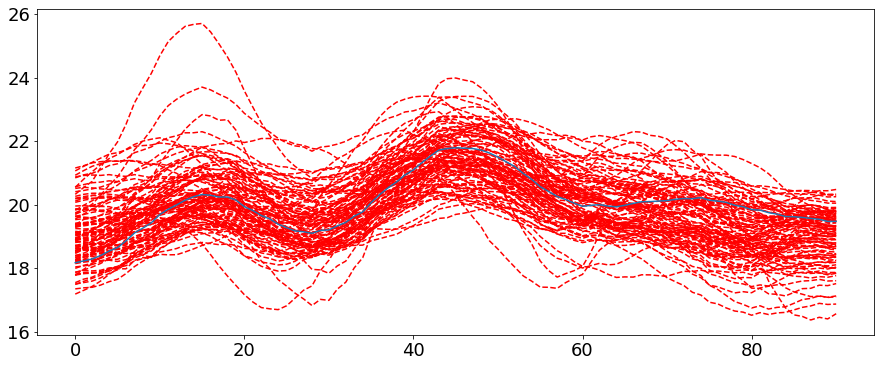

In [68]:
# plot_df = temp_df_245.iloc[799-91:799+91+91]

fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(Yt_hat.transpose(), "r--")
plt.plot(pred[0])
# plt.show()

# Dropout

## First iteration

In [6]:
with open("../data/temp_depth_gapfilling/temp_df_245_original.pickle", "rb") as pickle_in:
    temp_df_245_wgaps = pickle.load(pickle_in).asfreq('1d')
with open("../data/temp_depth_gapfilling/final_timeseries/temp_df_245_filled_2.pickle", "rb") as pickle_in:
    temp_df_245_filled_2 = pickle.load(pickle_in)

In [7]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [51]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.4), input_shape=train_data.shape[-2:]),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/first/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [52]:
bidirectional_lstm_targ91_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 91, 128)           34304     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 91, 64)            41216     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 16)                4672      
_________________________________________________________________
dense_3 (Dense)              (None, 91)                1547      
Total params: 81,739
Trainable params: 81,739
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0766, val_loss:  0.0774
..........loss:  0.0543, val_loss:  0.0535
..........loss:  0.0519, val_loss:  0.0518
..........loss:  0.0509, val_loss:  0.0501
..........loss:  0.0487, val_loss:  0.0508
..........loss:  0.0468, val_loss:  0.0498
..........loss:  0.0446, val_loss:  0.0477
..........loss:  0.0439, val_loss:  0.0467
..........loss:  0.0427, val_loss:  0.0487
.....

In [16]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.076611,0.076162,0.814195,0.988152,109.713158,0.077422,0.072161,0.824367,1.018719,113.182465
1,0.075333,0.075920,0.803873,0.991662,130.367874,0.075035,0.070410,0.802517,0.984434,129.933411
2,0.072051,0.070941,0.771316,0.920052,147.115463,0.070956,0.066109,0.759806,0.902949,151.997406
3,0.067413,0.066331,0.720426,0.819677,168.523239,0.065815,0.060263,0.701050,0.780794,162.418243
4,0.065057,0.066697,0.693900,1.303177,170.106216,0.063292,0.057406,0.673383,0.730260,166.820770
...,...,...,...,...,...,...,...,...,...,...
80,0.042655,0.042328,0.451556,0.355879,211.917068,0.048719,0.045267,0.525893,0.497097,221.835709
81,0.042137,0.041914,0.446104,0.349760,209.529312,0.049879,0.046359,0.539614,0.521973,229.522247
82,0.042244,0.042014,0.447013,0.348264,209.861771,0.049949,0.047224,0.539033,0.521273,230.055359
83,0.041803,0.042410,0.443194,0.344073,206.870209,0.049486,0.047410,0.533463,0.507436,232.531723


In [17]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/first/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/first/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [21]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

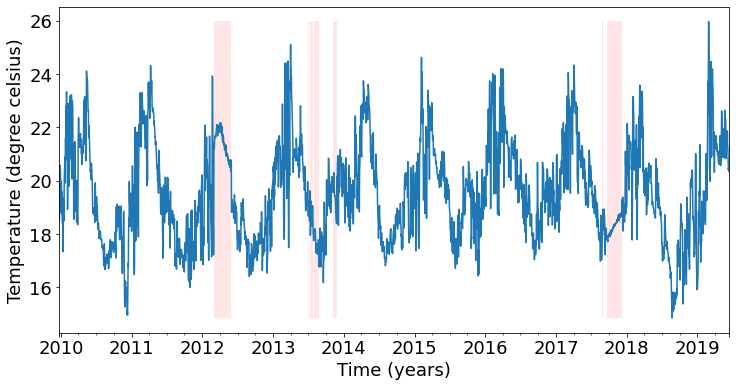

In [22]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [15]:
with open("../data/temp_depth_gapfilling/dropout/first/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [8]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [65]:
#load model 3
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/second/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [67]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/first/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [12]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Dropout(0.5),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [15]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss: 21.1477, val_loss:  0.0755
..........loss:  0.0637, val_loss:  0.0637
..

KeyboardInterrupt: 

In [26]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.077056,0.076987,0.819955,1.126645,121.279907,0.072393,0.071191,0.774047,0.910685,154.741623
1,0.075162,0.074917,0.803313,3.562443,156.008057,0.067847,0.066851,0.730631,0.842801,166.042496
2,0.066493,0.066766,0.717946,0.816249,167.536911,0.063024,0.062166,0.679512,0.745930,183.178986
3,0.061925,0.061950,0.668363,0.718727,186.003738,0.058478,0.057714,0.630165,0.648590,195.242706
4,0.057719,0.057509,0.620560,0.620438,196.834824,0.054479,0.053938,0.584289,0.562175,209.236847
...,...,...,...,...,...,...,...,...,...,...
283,0.032012,0.031958,0.341971,0.219618,154.992355,0.031804,0.031754,0.338533,0.214045,161.854950
284,0.032015,0.032024,0.342196,0.219208,152.449707,0.031641,0.031597,0.336080,0.212661,157.933044
285,0.031778,0.031944,0.339252,0.216436,154.957260,0.032345,0.032226,0.343842,0.218713,157.786026
286,0.031687,0.031635,0.338358,0.215911,152.149612,0.031662,0.031594,0.336775,0.211385,146.219955


In [27]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/first/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/first/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [30]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

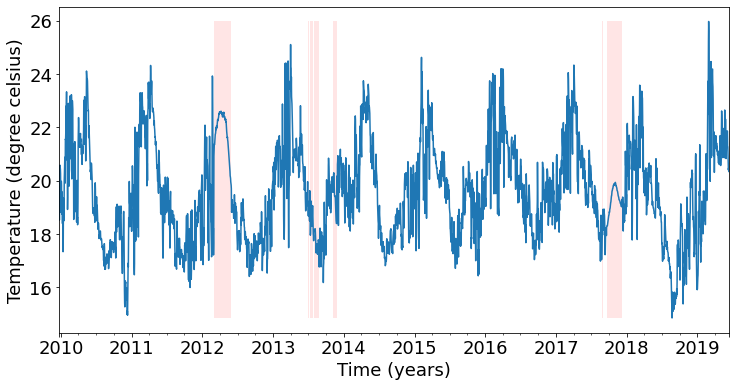

In [31]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [33]:
with open("../data/temp_depth_gapfilling/dropout/first/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

## Second interation

In [34]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [35]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/second/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [36]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0761, val_loss:  0.0750
..........loss: 301193.5000, val_loss: 22191.8926
..........loss:  0.0579, val_loss:  0.0583
.........

In [37]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.076106,0.075539,8.087018e-01,9.855844e-01,1.280214e+02,0.075003,0.070105,0.799597,9.762332e-01,1.504475e+02
1,0.071329,0.071433,7.626961e-01,9.006513e-01,1.665380e+02,0.097159,0.085850,1.023381,2.761111e+00,2.949186e+02
2,0.066634,0.066508,7.117571e-01,8.118079e-01,1.796081e+02,0.063824,0.058727,0.681822,7.495722e-01,1.751327e+02
3,0.061337,0.062473,6.581122e-01,7.086611e-01,1.945361e+02,0.058766,0.053078,0.628661,6.579470e-01,1.819781e+02
4,0.057712,0.057142,6.193947e-01,6.384464e-01,2.090921e+02,0.056339,0.051970,0.604491,6.141317e-01,1.945172e+02
5,0.056036,0.055744,6.004633e-01,6.038662e-01,2.085395e+02,0.054619,0.049734,0.582983,5.765857e-01,1.858629e+02
6,0.054828,0.053839,5.857385e-01,5.735132e-01,2.050486e+02,0.053863,0.050284,0.576901,5.658564e-01,1.929343e+02
7,0.054347,0.053259,5.803578e-01,5.626339e-01,2.093502e+02,0.054097,0.051407,0.582373,5.712035e-01,1.941647e+02
8,0.053942,0.054496,5.754198e-01,5.517426e-01,2.110250e+02,0.053069,0.048871,0.564125,5.416068e-01,1.842445e+02
9,0.053298,0.053544,5.671924e-01,5.354141e-01,2.101329e+02,0.053078,0.050386,0.568882,5.521293e-01,1.972000e+02


In [38]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/second/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/second/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [39]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

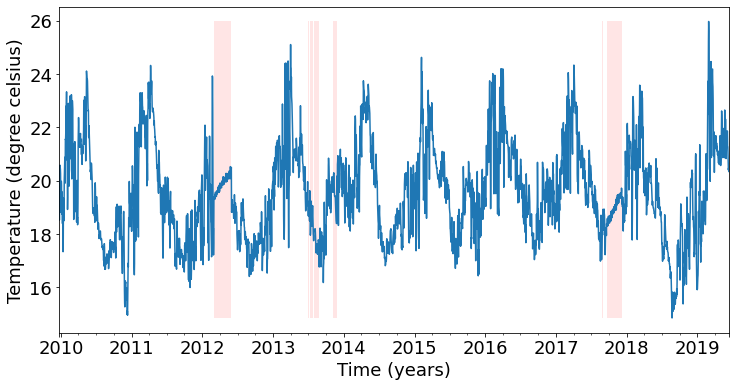

In [40]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [41]:
with open("../data/temp_depth_gapfilling/dropout/second/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [42]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [43]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/second/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [44]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1911, val_loss:  0.0741
..........loss:  0.0566, val_loss:  0.0550
..........loss:  0.0513, val_loss:  0.0495
..........loss:  0.0485, val_loss:  0.0471
..........loss:  0.0460, val_loss:  0.0454
..........loss:  0.0453, val_loss:  0.0433
..........loss:  0.0437, val_loss:  0.0425
..........loss:  0.0424, val_loss:  0.0412
..........loss:  0.0434, val_loss:  0.0408
..........loss:  0.0408, val_loss:  0.0396
..........loss:  0.0407, val_loss:  0.0391
..........loss:  0.0396, val_loss:  0.0386
..........loss:  0.0393, val_loss:  0.0387
..........loss:  0.2313, val_loss:  0.1199
..

In [45]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.191109,0.187690,2.141628,3552.321533,301.196167,0.074064,0.072609,0.787196,0.923444,114.036880
1,0.074438,0.074246,0.793457,0.952264,132.100128,0.070730,0.069529,0.754878,0.866274,136.328918
2,0.070568,0.070602,0.755316,0.870028,157.941422,0.066613,0.065688,0.714402,0.790679,177.174805
3,0.065898,0.065820,0.706974,0.772361,190.876877,0.062105,0.061457,0.668012,0.706580,207.526840
4,0.061043,0.060788,0.654525,0.671990,215.224777,0.057914,0.057361,0.620938,0.619930,232.143127
...,...,...,...,...,...,...,...,...,...,...
127,0.331659,0.336730,3.484572,119.939697,1884.576172,0.191202,0.188495,2.067960,25.135994,681.272705
128,0.273561,0.274231,2.880270,76.586647,1423.453125,0.154645,0.152189,1.669158,14.273763,543.345947
129,0.265783,0.267992,2.809715,65.216362,1567.006592,0.134575,0.132334,1.446892,11.683013,422.317688
130,0.231306,0.234687,2.436716,50.506660,1221.682495,0.119935,0.118118,1.283252,8.177528,376.695892


In [46]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/second/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/second/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [47]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

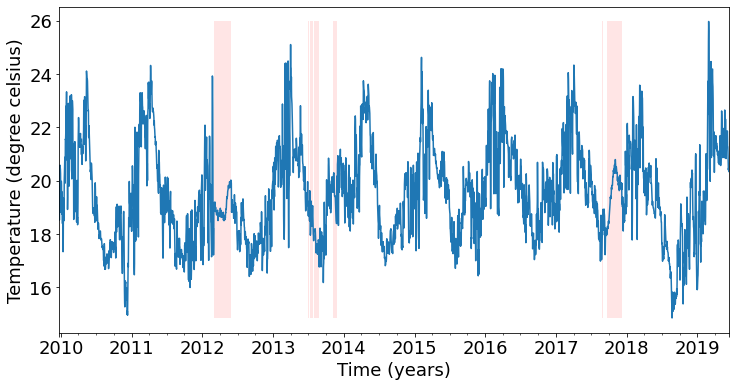

In [48]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [49]:
with open("../data/temp_depth_gapfilling/dropout/second/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

## Third iteration

In [50]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [51]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/third/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [52]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1605, val_loss:  0.0775
..........loss:  0.0540, val_loss:  0.0546
..........loss:  0.0522, val_loss:  0.0517
..........loss:  0.0500, val_loss:  0.0502
..........loss:  0.0495, val_loss:  0.0508
..........loss:  0.0472, val_loss:  0.0476
..........loss:  0.0457, val_loss:  0.0500
..........loss:  0.0447, val_loss:  0.0484
..........loss:  0.0456, val_loss:  0.0451
..........loss:  0.0438, val_loss:  0.0457
..........loss:  0.0438, val_loss:  0.0457
..........loss:  0.0425, val_loss:  0.0434
..........loss:  0.0419, val_loss:  0.0439
..........loss:  0.0418, val_loss:  0.0458
..........loss:  0.0413, val_loss:  0.0432
..........loss:  0.0410, val_loss:  0.0416
..........loss:  0.0403, val_loss:  0.0433
.........

In [53]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.160477,0.158057,1.625373,1518.839966,345.255890,0.077495,0.072103,0.824215,1.017549,111.696007
1,0.075154,0.075763,0.801318,0.983382,127.485443,0.073772,0.069198,0.791410,0.973155,140.726776
2,0.070811,0.070135,0.762653,0.911656,162.573685,0.068718,0.065073,0.742815,0.887805,162.625320
3,0.066017,0.066467,0.714383,0.824452,187.556824,0.064495,0.060925,0.694569,0.800561,191.741348
4,0.061776,0.060867,0.666233,0.726631,198.903809,0.059875,0.056085,0.643694,0.691754,194.015198
...,...,...,...,...,...,...,...,...,...,...
164,0.040014,0.039515,0.425580,0.332040,192.631912,0.044663,0.042882,0.477209,0.399720,211.768692
165,0.041009,0.041611,0.435774,0.343068,203.605072,0.041922,0.039514,0.446809,0.359684,189.937164
166,0.040113,0.039699,0.425998,0.329841,193.109650,0.042847,0.040549,0.458254,0.371940,200.245895
167,0.040185,0.039704,0.427340,0.333861,194.013580,0.042401,0.040108,0.451663,0.364940,200.058319


In [54]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/third/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/third/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [55]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

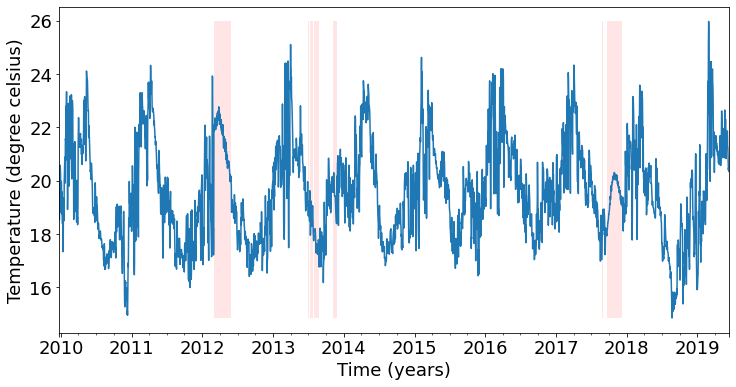

In [56]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [57]:
with open("../data/temp_depth_gapfilling/dropout/third/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [58]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [59]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/third/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [60]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0818, val_loss:  0.0745
..........loss:  0.0590, val_loss:  0.0572
..........loss:  0.0511, val_loss:  0.0495
..........loss:  0.0483, val_loss:  0.0477
..........loss:  0.0468, val_loss:  0.0458
..........loss:  0.0451, val_loss:  0.0438
..........loss:  0.0437, val_loss:  0.0428
..........loss:  0.0428, val_loss:  0.0417
..........loss:  0.0420, val_loss:  0.0413
..........loss:  0.0417, val_loss:  0.0401
..........loss:  0.0407, val_loss:  0.0398
..........loss:  0.0403, val_loss:  0.0389
..........loss:  0.0396, val_loss:  0.0387
..........loss:  0.0391, val_loss:  0.0380
..........loss:  0.0385, val_loss:  0.0376
..........loss:  0.0380, val_loss:  0.0377
..........loss:  0.0375, val_loss:  0.0376
..........loss:  0.0372, val_loss:  0.0374
..........loss:  0.0368, val_loss:  0.0377
..........loss:  0.0366, val_loss:  0.0371
..........loss:  0.0366, val_loss:  0.0378
..........loss:  0.0360, val_loss:  0.0364
..........loss:  0.0367, val_loss:  0.0356
..........loss:  0.03

In [61]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.081760,0.081729,0.874363,6.440664,130.811752,0.074529,0.073094,0.793154,0.938209,117.364510
1,0.411792,0.401546,4.492612,29933.744141,1135.145264,0.073535,0.072159,0.783389,0.917827,120.321892
2,0.074706,0.074580,0.798010,0.954005,125.478378,0.072701,0.071406,0.776127,0.906809,126.130348
3,0.073603,0.073326,0.787802,0.936639,134.197205,0.071480,0.070271,0.764548,0.886562,130.977798
4,0.071764,0.072056,0.769140,0.900943,140.097000,0.069146,0.068063,0.740293,0.841644,149.451706
...,...,...,...,...,...,...,...,...,...,...
256,0.035286,0.035417,0.376642,0.259862,166.784302,0.035045,0.034898,0.372967,0.256345,160.159027
257,0.035092,0.035037,0.374081,0.256807,161.372177,0.036297,0.036114,0.385118,0.274298,178.755997
258,0.035076,0.035070,0.374079,0.257180,162.849365,0.035327,0.035141,0.375182,0.261813,164.543106
259,0.035073,0.035192,0.373824,0.255776,163.064972,0.035662,0.035562,0.378840,0.266160,183.510223


In [62]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/third/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/third/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [63]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

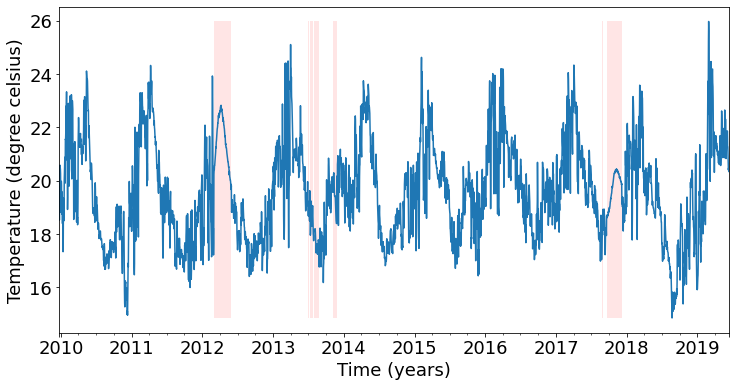

In [64]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [65]:
with open("../data/temp_depth_gapfilling/dropout/third/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

## Fourth iteration

In [66]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [67]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/fourth/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [68]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0895, val_loss:  0.0768
..........loss:  0.0542, val_loss:  0.0530
..........loss:  0.0513, val_loss:  0.0499
..........loss:  0.0522, val_loss:  0.0517
..........loss:  0.0503, val_loss:  0.0495
....

In [69]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.089452,0.089736,0.937002,29.772638,152.250885,0.076839,0.071319,0.817818,1.008615,130.586609
1,0.073886,0.073582,0.788769,0.949842,143.638336,0.073662,0.068116,0.786854,0.951770,139.984726
2,0.070265,0.069082,0.753584,0.889013,168.241318,0.069223,0.063741,0.741202,0.870467,161.928253
3,0.066393,0.067481,0.712639,0.812471,182.095139,0.064679,0.059083,0.692445,0.781466,172.775818
4,0.062361,0.061524,0.670451,0.737345,200.426208,0.060533,0.055030,0.647788,0.701088,190.096680
5,0.059667,0.059932,0.639465,0.672740,209.300079,0.057692,0.052593,0.615790,0.634233,193.722092
6,0.057962,0.057143,0.618047,0.634951,211.805481,0.057044,0.051938,0.611088,0.624328,193.220871
7,0.056687,0.056220,0.605396,0.606397,209.517197,0.055834,0.050257,0.592362,0.590173,176.529663
8,0.056100,0.055900,0.597973,0.591907,206.853348,0.056665,0.051010,0.598725,0.608466,223.672195
9,0.054727,0.054981,0.583912,0.566800,214.958954,0.053836,0.048717,0.571306,0.551860,179.496979


In [70]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/fourth/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/fourth/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [71]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

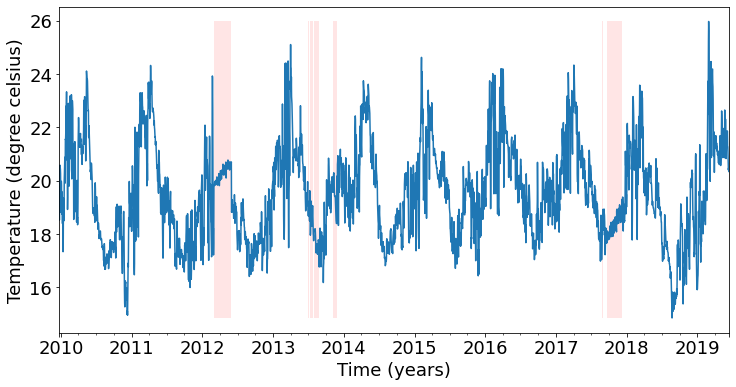

In [72]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [73]:
with open("../data/temp_depth_gapfilling/dropout/fourth/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [74]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [75]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/fourth/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [76]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1132, val_loss:  0.0747
..........loss:  0.0593, val_loss:  0.0581
..........loss:  0.0504, val_loss:  0.0509
..........loss:  0.0475, val_loss:  0.0474
..........loss: 1265.1841, val_loss: 1282.1748
..........loss: 70.0602, val_loss: 93.1611
...

In [77]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,1.131914e-01,1.120586e-01,1.199964e+00,3.065768e+02,4.412457e+02,7.465268e-02,7.323349e-02,7.951351e-01,9.418457e-01,1.097545e+02
1,3.494528e-01,3.411406e-01,4.088706e+00,2.336968e+04,5.435989e+02,7.355843e-02,7.229638e-02,7.869484e-01,9.315152e-01,1.269776e+02
2,7.362191e-02,7.355447e-02,7.933606e-01,9.582186e-01,1.515572e+02,7.075839e-02,6.986018e-02,7.632148e-01,9.010276e-01,1.606097e+02
3,7.090922e-02,7.075324e-02,7.716417e-01,9.248534e-01,1.915000e+02,6.846141e-02,6.787041e-02,7.429608e-01,8.710661e-01,1.864976e+02
4,6.877808e-02,6.866482e-02,7.507969e-01,8.839838e-01,2.023114e+02,6.697629e-02,6.654987e-02,7.296301e-01,8.519590e-01,2.081503e+02
5,6.694464e-02,6.683472e-02,7.320167e-01,8.473926e-01,2.084465e+02,6.579990e-02,6.527024e-02,7.158533e-01,8.186525e-01,1.973628e+02
6,6.607297e-02,6.593145e-02,7.212102e-01,8.215581e-01,2.034767e+02,6.479554e-02,6.435382e-02,7.061099e-01,8.021177e-01,2.131605e+02
7,6.431657e-02,6.427103e-02,7.008833e-01,7.790217e-01,2.105750e+02,6.281085e-02,6.235752e-02,6.827999e-01,7.541046e-01,2.179941e+02
8,6.250121e-02,6.243069e-02,6.799196e-01,7.351364e-01,2.242298e+02,6.135539e-02,6.074541e-02,6.658077e-01,7.210842e-01,2.109494e+02
9,6.064402e-02,6.056902e-02,6.566999e-01,6.853437e-01,2.125745e+02,5.957834e-02,5.877794e-02,6.437012e-01,6.815006e-01,2.064673e+02


In [78]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/fourth/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/fourth/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [79]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

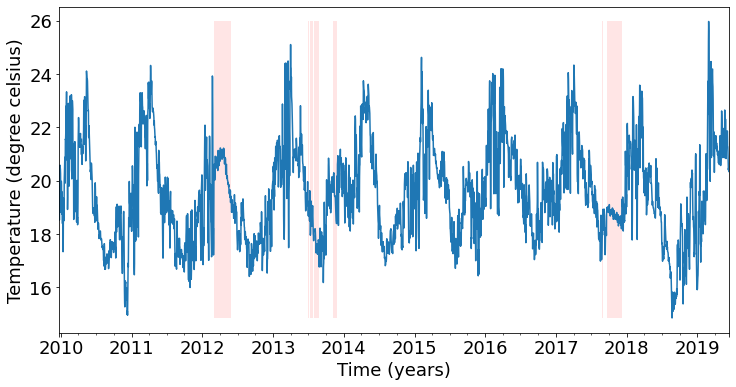

In [80]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [81]:
with open("../data/temp_depth_gapfilling/dropout/fourth/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

## Fifth iteration

In [82]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [83]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/fifth/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [84]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0763, val_loss:  0.0759
..........loss:  0.0533, val_loss:  0.0522
..........loss:  0.0522, val_loss:  0.0516
..........loss:  0.0492, val_loss:  0.0484
..........loss:  0.0468, val_loss:  0.0467
..........loss:  0.0495, val_loss:  0.0480
..........loss:  0.0462, val_loss:  0.0494
...

In [85]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.076349,0.077341,0.811480,0.983367,114.909325,0.075880,0.070414,0.808594,0.993541,129.361725
1,0.072493,0.071619,0.774694,0.922876,152.614960,0.071235,0.065781,0.761087,0.901463,153.446884
2,0.066998,0.067801,0.718740,0.817023,180.328506,0.064132,0.059302,0.685673,0.763432,178.272110
3,0.060786,0.060261,0.651757,0.691248,199.673416,0.057734,0.052791,0.616201,0.637867,180.191589
4,0.057303,0.057136,0.614139,0.622977,205.484940,0.057689,0.053190,0.612498,0.625036,188.483597
...,...,...,...,...,...,...,...,...,...,...
58,0.046653,0.046968,0.495201,0.415768,221.849396,0.047131,0.044028,0.502552,0.424423,215.895676
59,0.046725,0.046193,0.494986,0.413238,219.190430,0.048459,0.045467,0.519394,0.460575,216.168610
60,0.046155,0.046488,0.489736,0.404225,218.924881,0.049403,0.046625,0.533394,0.498750,219.651718
61,0.046197,0.047467,0.491109,0.408123,222.972870,0.047532,0.044805,0.506268,0.432181,220.403458


In [86]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/fifth/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/fifth/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [87]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

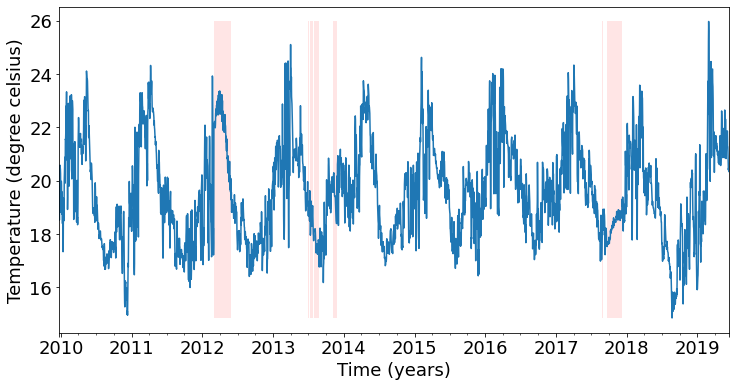

In [88]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [89]:
with open("../data/temp_depth_gapfilling/dropout/fifth/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [90]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [91]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/fifth/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [92]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0758, val_loss:  0.0710
..........loss:  0.0527, val_loss:  0.0514
..........loss:  0.0462, val_loss:  0.0450
..........loss:  0.0445, val_loss:  0.0431
..........loss:  0.0428, val_loss:  0.0411
..........loss:  0.0421, val_loss:  0.0404
..........loss:  0.0413, val_loss:  0.0404
..........loss:  0.0431, val_loss:  0.0423
..........loss:  0.0406, val_loss:  0.0399
......

In [93]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.075840,0.075588,0.807498,0.975558,119.354469,0.070971,0.069806,0.757498,0.890939,145.933365
1,0.070138,0.069849,0.754508,0.889291,157.990295,0.065029,0.064284,0.700528,0.786483,170.946609
2,0.064076,0.064068,0.691069,0.878338,183.422485,0.058829,0.058361,0.634624,0.669370,192.957581
3,0.071222,0.071069,0.757881,34.362709,235.306412,0.181656,0.169026,1.991136,82.216766,608.824768
4,0.157363,0.154519,1.624485,372.016785,466.623108,0.060543,0.059915,0.656135,0.693127,186.155380
...,...,...,...,...,...,...,...,...,...,...
81,0.040806,0.040885,0.435170,0.329930,178.584564,0.040683,0.040349,0.431952,0.322498,181.141998
82,0.040507,0.040549,0.432037,0.326319,184.426208,0.039473,0.039268,0.421052,0.304125,181.150452
83,0.040282,0.040276,0.429412,0.323277,181.471466,0.039881,0.039690,0.424548,0.308941,182.006348
84,0.040249,0.040194,0.428903,0.322371,182.096603,0.040809,0.040534,0.436562,0.336796,196.100342


In [94]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/fifth/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/fifth/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [95]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

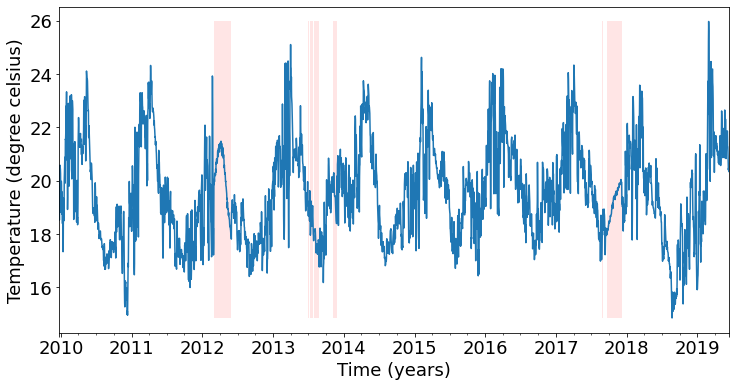

In [96]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [97]:
with open("../data/temp_depth_gapfilling/dropout/fifth/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

## Sixth iteration

In [98]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [99]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/sixth/bidirectional_lstm_daily_hist91_targ91_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [100]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0753, val_loss:  0.0737
..........loss:  0.0526, val_loss:  0.0519
..........loss:  0.0507, val_loss:  0.0498
..........loss:  0.0524, val_loss:  0.0531
..........loss:  0.0502, val_loss:  0.0476
..........loss:  0.0529, val_loss:  0.0513
..........loss:  0.0489, val_loss:  0.0499
....

In [101]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.075268,0.075080,0.801598,0.968566,128.431396,0.073652,0.068301,0.789401,0.966117,150.173538
1,0.070103,0.069407,0.753393,0.888848,173.945984,0.067669,0.063546,0.730844,0.865525,190.813248
2,0.064930,0.066644,0.701879,0.797096,194.207565,0.062805,0.058311,0.680770,0.767273,180.744400
3,0.061174,0.061571,0.662271,0.723073,205.398651,0.059567,0.055877,0.644601,0.699082,182.855560
4,0.058774,0.058429,0.634628,0.666280,202.079254,0.057151,0.052932,0.616140,0.647008,180.161896
...,...,...,...,...,...,...,...,...,...,...
59,0.049263,0.049546,0.524641,0.471955,214.138626,0.050111,0.046300,0.540043,0.509761,216.305588
60,0.048921,0.048551,0.522415,0.469920,215.920929,0.049932,0.046740,0.533701,0.493226,210.242889
61,0.049177,0.049293,0.522991,0.469071,220.179169,0.049080,0.045785,0.525534,0.483630,205.143723
62,0.048720,0.049353,0.518890,0.461983,221.144592,0.049834,0.046331,0.536262,0.506422,212.857300


In [102]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/sixth/bidirectional_lstm_model_hist91_targ91_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/sixth/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5')

In [103]:
# Make a copy of the original timeseries and fill gaps with Model 1
temp_df_245_filled_3 = temp_df_245_filled_2.copy()
temp_df_245_filled_3 = gapfill(temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

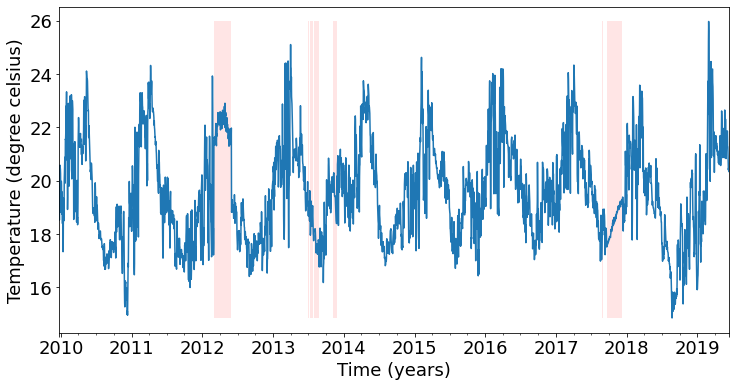

In [104]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [105]:
with open("../data/temp_depth_gapfilling/dropout/sixth/temp_df_245_filled_3.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

Multivariate

In [106]:
with open("../data/temp_depth_gapfilling/simple/train_mean-std_train-val_data-labels_hist91_targ91_multivariate.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]
train_data = (train_data-train_mean)/train_std
train_labels = (train_labels-train_mean)/train_std
val_data = (val_data-train_mean)/train_std
val_labels = (val_labels-train_mean)/train_std

In [107]:
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:], dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, dropout=0.4)),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu', dropout=0.4)),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/sixth/bidirectional_lstm_daily_hist91_targ91_multivariate_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [108]:
# Model 1 Training
# STEPS = int(train_data.shape[0]/BATCH_SIZE)
# VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500
BATCH_SIZE = 64

history = bidirectional_lstm_targ91_model.fit(train_data, train_labels, epochs=EPOCHS,
#                       steps_per_epoch=STEPS,
                      validation_data=(val_data, val_labels), shuffle=True, verbose=0, batch_size=BATCH_SIZE, 
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.0757, val_loss:  0.0711
..........loss:  0.0488, val_loss:  0.0469
..........loss:  0.0440, val_loss:  0.0424
..........loss:  0.0404, val_loss:  0.0393
..........loss:  0.0388, val_loss:  0.0373
..........loss:  0.0379, val_loss:  0.0361
..........loss:  0.0374, val_loss:  0.0369
..........loss:  0.0359, val_loss:  0.0352
..........loss:  0.0349, val_loss:  0.0340
..........loss:  0.0346, val_loss:  0.0334
..........loss:  0.0342, val_loss:  0.0329
..........loss:  0.0334, val_loss:  0.0321
..........loss:  0.0328, val_loss:  0.0316
..........loss:  0.0324, val_loss:  0.0311
..........loss:  0.0321, val_loss:  0.0311
..........loss:  0.0316, val_loss:  0.0303
..........loss:  0.0314, val_loss:  0.0307
..........loss:  0.0313, val_loss:  0.0306
..........loss:  0.0309, val_loss:  0.0298
..........loss:  0.0322, val_loss:  0.0305
..........loss:  0.0305, val_loss:  0.0294
..........loss:  0.0302, val_loss:  0.0295
..........loss:  0.0300, val_loss:  0.0291
..........loss:  0.02

In [109]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.075687,0.075762,0.807996,0.979195,121.919548,0.071107,0.070037,0.765537,0.914935,156.097000
1,0.069765,0.069513,0.755521,0.898859,161.878448,0.065023,0.064353,0.707461,0.810287,184.658142
2,0.071404,0.071210,0.778262,1.158924,214.764877,0.066458,0.065451,0.722960,0.948152,230.143051
3,0.067292,0.067005,0.732550,1.073526,215.017471,0.060290,0.059304,0.652829,0.747543,226.972092
4,0.059872,0.059804,0.647854,0.744377,203.092239,0.054854,0.054060,0.593006,0.599497,187.005127
...,...,...,...,...,...,...,...,...,...,...
307,0.028784,0.028898,0.307149,0.185511,140.709686,0.028162,0.028204,0.300829,0.178766,137.803894
308,0.028791,0.028913,0.307180,0.184755,139.138168,0.027844,0.027920,0.296813,0.175309,139.667130
309,0.028748,0.028860,0.306797,0.185033,138.656296,0.028139,0.028184,0.299928,0.179474,136.546524
310,0.028847,0.028875,0.307787,0.185713,139.052078,0.027780,0.027830,0.295972,0.174246,137.797318


In [110]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/sixth/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/sixth/saved_models/bidirectional_lstm_model_hist91_targ91_multivariate_loss-descaledmape.h5')

In [111]:
hist_len = 91
targ_len = 91
samp = temp_df_245_filled_2.copy()
gaps = gap_loc_and_len(samp.TEMP)
for i in range(len(gaps)):
    gap_start = gaps.location[i]
    gap_len = gaps.length[i]
    hist_before = samp.TEMP.values[(gap_start-hist_len):(gap_start), np.newaxis]
    hist_after = samp.TEMP.values[(gap_start+hist_len+gap_len-1):(gap_start+gap_len-1):-1, np.newaxis]
    hist = np.reshape(np.hstack([hist_before, hist_after]), (1, 91, 2))
    hist = (hist - train_mean)/train_std
    pred = bidirectional_lstm_targ91_model.predict(hist)
    pred = pred*train_std + train_mean
    samp.TEMP[gap_start:(gap_start+gap_len)] = pred[0,:gap_len]
temp_df_245_filled_3 = samp    

Text(0.5, 0, 'Time (years)')

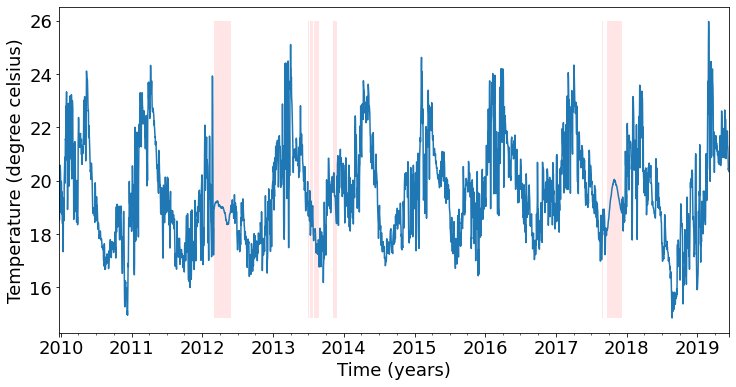

In [112]:
####################
# Below plot is based on reverse prediction using three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

In [113]:
with open("../data/temp_depth_gapfilling/dropout/sixth/temp_df_245_filled_3_multivariate.pickle", "wb") as pickle_in:
    pickle.dump(temp_df_245_filled_3, pickle_in)

# Old attempt

## First iteration

In [8]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [9]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_daily_hist30_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [10]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.1832, val_loss:  0.1296
..........loss:  0.0873, val_loss:  0.0430
..........loss:  0.0798, val_loss:  0.0615
..........loss:  0.0722, val_loss:  0.0394
..........loss:  0.0698, val_loss:  0.0409
..........loss:  0.0674, val_loss:  0.0372
..........loss:  0.0637, val_loss:  0.0367
..........loss:  0.0614, val_loss:  0.0270
..........loss:  0.0586, val_loss:  0.0264
..........loss:  0.0568, val_loss:  0.0246
..........loss:  0.0519, val_loss:  0.0290
..........loss:  0.0494, val_loss:  0.0283
..........loss:  0.0469, val_loss:  0.0235
..........loss:  0.0460, val_loss:  0.0262
..........loss:  0.0426, val_loss:  0.0257
..........loss:  0.0388, val_loss:  0.0271
..........loss:  0.0383, val_loss:  0.0289
..........loss:  0.0359, val_loss:  0.0241
..........loss:  0.0339, val_loss:  0.0253
..........loss:  0.0320, val_loss:  0.0229
..........loss:  0.0305, val_loss:  0.0225
..........loss:  0.0295, val_loss:  0.0232
..........loss:  0.0274, val_loss:  0.0219
..........loss:  0.02

In [11]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5')

In [12]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.183200,0.183200,5.571743,68.799995,28.328495,0.129631,0.129631,4.014608,18.280766,19.845644
1,0.133014,0.132983,4.043096,34.201420,20.574587,0.096969,0.096969,3.014242,10.846600,14.815876
2,0.149159,0.148795,4.541935,59.067867,23.050039,0.093015,0.093015,2.898424,10.258302,14.192542
3,0.111590,0.111553,3.395440,18.858032,17.252205,0.095222,0.095222,2.959241,10.434984,14.551147
4,0.103167,0.103216,3.134064,15.767738,15.964046,0.059258,0.059258,1.857859,4.867879,9.013662
...,...,...,...,...,...,...,...,...,...,...
245,0.025480,0.025435,0.781551,1.122873,3.923968,0.023764,0.023764,0.738363,1.029976,3.635924
246,0.025779,0.025709,0.790912,1.142402,3.969338,0.022487,0.022487,0.694731,0.946435,3.451146
247,0.025878,0.025816,0.793253,1.132034,3.986421,0.024038,0.024038,0.744448,1.012856,3.682873
248,0.025700,0.025675,0.788602,1.107590,3.956840,0.022062,0.022062,0.680333,0.888529,3.389011


Model 2

In [13]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [14]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ30_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(30)
])
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_daily_hist30_targ30_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [15]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ30_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.2674, val_loss:  0.1465
..........loss:  0.0805, val_loss:  0.0449
..........loss:  0.0778, val_loss:  0.0446
..........loss:  0.0738, val_loss:  0.0333
..........loss:  0.0751, val_loss:  0.0349
..........loss:  0.0708, val_loss:  0.0330
..........loss:  0.0680, val_loss:  0.0367
..........loss:  0.0658, val_loss:  0.0320
..........loss:  0.0612, val_loss:  0.0309
..........loss:  0.0590, val_loss:  0.0314
..........loss:  0.0578, val_loss:  0.0304
..........loss:  0.0557, val_loss:  0.0316
..........loss:  0.0535, val_loss:  0.0328
..........loss:  0.0498, val_loss:  0.0292
..........loss:  0.0482, val_loss:  0.0308
..........loss:  0.0458, val_loss:  0.0288
..........loss:  0.0437, val_loss:  0.0329
..........loss:  0.0423, val_loss:  0.0308
..........loss:  0.0412, val_loss:  0.0302
..........loss:  0.0396, val_loss:  0.0299
..........loss:  0.0374, val_loss:  0.0278
..........loss:  0.0363, val_loss:  0.0280
..........loss:  0.0344, val_loss:  0.0261
..........loss:  0.03

In [16]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ30_model.save('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5')

In [17]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.267394,0.267394,8.112693,118.643578,41.245922,0.146532,0.146532,4.493061,23.500414,22.473351
1,0.128931,0.128876,3.911143,25.902216,19.891140,0.110689,0.110689,3.418366,14.370637,16.909380
2,0.111988,0.111947,3.399338,18.684572,17.272110,0.044626,0.044626,1.393696,3.312761,6.782961
3,0.101401,0.101501,3.077497,15.127867,15.640275,0.036189,0.036189,1.109372,1.959188,5.558882
4,0.092980,0.093231,2.823302,12.623695,14.338586,0.037199,0.037199,1.153562,2.266646,5.676670
...,...,...,...,...,...,...,...,...,...,...
495,0.022252,0.022219,0.678247,0.843171,3.426349,0.019666,0.019666,0.594907,0.682547,3.040605
496,0.022146,0.022130,0.675498,0.851426,3.408818,0.019670,0.019670,0.596145,0.687629,3.038477
497,0.022392,0.022386,0.682238,0.858307,3.448807,0.019570,0.019570,0.591930,0.683843,3.026064
498,0.022159,0.022143,0.676058,0.846960,3.409880,0.019434,0.019434,0.589395,0.678572,3.000656


Model 3

In [8]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [9]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),    
    layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_daily_hist91_targ91_4layers_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [10]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ91_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss: 40.7896, val_loss:  0.1204
..........loss:  0.1079, val_loss:  0.0710
..........loss:  0.0914, val_loss:  0.0644
..........loss:  0.0842, val_loss:  0.0434
..........loss:  0.0771, val_loss:  0.0518
..........loss:  0.1125, val_loss:  0.0580
..........loss:  0.0978, val_loss:  0.0538
.....

In [11]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/one/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5')

In [12]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,40.789604,40.789604,1147.992188,3.266892e+09,6570.187500,0.120377,0.120377,3.748159,19.051056,18.344065
1,0.153957,0.153845,4.665606,4.276789e+01,23.813990,0.086623,0.086623,2.723704,10.786603,13.130168
2,0.141479,0.141130,4.295459,3.744085e+01,21.863857,0.087997,0.087997,2.767091,11.072300,13.337495
3,0.141509,0.141131,4.301066,3.583673e+01,21.856199,0.104574,0.104574,3.268813,14.522412,15.901955
4,0.141230,0.140840,4.282835,3.204467e+01,21.837597,0.078940,0.078940,2.488787,9.395330,11.948837
...,...,...,...,...,...,...,...,...,...,...
60,0.097846,0.098031,2.982048,1.439426e+01,15.093302,0.053808,0.053808,1.678363,4.451674,8.205873
61,0.097470,0.097253,2.967225,1.470435e+01,15.042726,0.051712,0.051712,1.588281,3.800015,7.956906
62,0.096018,0.095785,2.923130,1.397296e+01,14.821105,0.053744,0.053744,1.678421,4.488625,8.190194
63,0.092872,0.092600,2.825293,1.275410e+01,14.338546,0.050828,0.050828,1.565542,3.733033,7.808720


## Second iteration

In [23]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [24]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_daily_hist30_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [25]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.3427, val_loss:  0.1061
..........loss:  0.0834, val_loss:  0.0272
..........loss:  0.0775, val_loss:  0.0771
..........loss:  0.0689, val_loss:  0.0725
..........loss:  0.0662, val_loss:  0.0353
..........loss:  0.0660, val_loss:  0.0343
..........loss:  0.0628, val_loss:  0.0344
..........loss:  0.0590, val_loss:  0.0314
..........loss:  0.0580, val_loss:  0.0235
..........loss:  0.0549, val_loss:  0.0235
..........loss:  0.0523, val_loss:  0.0257
..........loss:  0.0502, val_loss:  0.0249
..........loss:  0.0468, val_loss:  0.0231
..........loss:  0.0449, val_loss:  0.0393
..........loss:  0.0435, val_loss:  0.0235
..........loss:  0.0407, val_loss:  0.0237
..........loss:  0.0391, val_loss:  0.0230
..........loss:  0.0365, val_loss:  0.0233
..........loss:  0.0362, val_loss:  0.0240
..........loss:  0.0338, val_loss:  0.0232
.....

In [26]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5')

In [27]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.342739,0.342739,10.411130,165.283585,53.031227,0.106129,0.106129,3.300408,14.765525,16.211794
1,0.133778,0.133480,4.067438,28.003069,20.689732,0.049317,0.049317,1.553475,3.751265,7.483500
2,0.120946,0.121176,3.674156,22.000351,18.713785,0.046518,0.046518,1.462452,3.460771,7.067779
3,0.112123,0.112579,3.413092,19.184450,17.331209,0.035985,0.035985,1.126362,2.168678,5.486267
4,0.102472,0.102222,3.115000,15.767838,15.849992,0.108156,0.108156,3.352830,12.844685,16.549412
...,...,...,...,...,...,...,...,...,...,...
190,0.033831,0.033793,1.035981,1.842984,5.213095,0.023199,0.023199,0.714815,1.008707,3.564282
191,0.034190,0.034254,1.045628,1.844565,5.272818,0.022851,0.022851,0.704848,0.988640,3.509209
192,0.034476,0.034420,1.059091,1.880474,5.303278,0.025216,0.025216,0.782951,1.128524,3.858275
193,0.034156,0.034153,1.046397,1.885180,5.262385,0.025069,0.025069,0.779898,1.127476,3.832281


Model 2

In [28]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [29]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ30_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(30)
])
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_daily_hist30_targ30_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [30]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ30_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.2673, val_loss:  0.1739
..........loss:  0.0890, val_loss:  0.0810
..........loss:  0.0771, val_loss:  0.0464
..........loss:  0.0759, val_loss:  0.0363
..........loss:  0.0717, val_loss:  0.0341
..........loss:  0.0684, val_loss:  0.0371
..........loss:  0.0682, val_loss:  0.0405
..........loss:  0.0653, val_loss:  0.0322
..........loss:  0.0608, val_loss:  0.0313
..........loss:  0.0593, val_loss:  0.0295
..........loss:  0.0562, val_loss:  0.0302
..........loss:  0.0542, val_loss:  0.0312
..........loss:  0.0525, val_loss:  0.0288
..........loss:  0.0494, val_loss:  0.0285
..........loss:  0.0488, val_loss:  0.0298
..........loss:  0.0460, val_loss:  0.0293
..........loss:  0.0446, val_loss:  0.0284
..........loss:  0.0421, val_loss:  0.0309
..........loss:  0.0402, val_loss:  0.0275
..........loss:  0.0383, val_loss:  0.0266
..........loss:  0.0364, val_loss:  0.0274
..........loss:  0.0353, val_loss:  0.0265
..........loss:  0.0342, val_loss:  0.0261
..........loss:  0.03

In [31]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ30_model.save('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5')

In [32]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.267311,0.267311,8.109192,128.839081,41.235153,0.173865,0.173865,5.310523,32.278713,26.721708
1,0.246203,0.245878,7.440592,5031.206543,38.053726,0.105097,0.105097,3.238926,13.104982,16.074383
2,0.121939,0.121738,3.703522,23.627398,18.799631,0.104073,0.104073,3.203687,12.471953,15.927822
3,0.108410,0.108680,3.292538,17.796030,16.714705,0.105601,0.105601,3.250615,12.764646,16.161764
4,0.105154,0.105177,3.193137,16.448093,16.214958,0.076018,0.076018,2.363821,7.709574,11.569817
...,...,...,...,...,...,...,...,...,...,...
495,0.021869,0.021866,0.667281,0.827976,3.365069,0.019093,0.019093,0.580049,0.649893,2.945166
496,0.021637,0.021609,0.659865,0.807721,3.330443,0.018295,0.018295,0.553237,0.613374,2.828518
497,0.021655,0.021656,0.660184,0.802602,3.333905,0.019126,0.019126,0.580020,0.651686,2.953007
498,0.021762,0.021758,0.663002,0.810763,3.351902,0.020293,0.020293,0.612673,0.713016,3.139833


Model 3

In [13]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [14]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),    
    layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_daily_hist91_targ91_4layers_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [15]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ91_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss: 130994232.0000, val_loss:  0.6428
..........loss: 16.2630, val_loss:  0.5765
..........loss:  9.9562, val_loss:  0.5098
..........loss:  0.4141, val_loss:  0.4317
..........loss: 15.1132, val_loss:  4.7271
..........loss: 171.4086, val_loss: 785.6028
..........loss: 74.7525, val_loss:  0.2429
..........loss: 17.3886, val_loss:  0.1694
..........loss: 1179.5398, val_loss:  4.6352
..........loss:  7.3745, val_loss:  0.0586
..........loss: 11.4756, val_loss:  0.0518
..........loss:  6.1286, val_loss:  0.0512
..........loss:  0.3917, val_loss:  0.0511
..........loss:  0.0926, val_loss:  0.0511
..........loss:  0.0961, val_loss:  0.0511
..........loss:  0.0834, val_loss:  0.0511
..........loss:  0.0574, val_loss:  0.0511
..........loss:  0.0662, val_loss:  0.0511
..........loss:  0.0500, val_loss:  0.0511
..........loss:  0.0501, val_loss:  0.0511
..........loss:  0.0530, val_loss:  0.0511
..........loss:  0.0562, val_loss:  0.0510
..........loss:  0.0461, val_loss:  0.0452
..........

In [16]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/two/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5')

In [17]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,1.309942e+08,1.309942e+08,3.771242e+09,1.958060e+22,2.081051e+10,0.642823,0.642823,19.527489,384.895386,99.287926
1,1.101237e+02,1.114345e+02,3.334786e+03,8.359511e+08,1.703304e+04,0.635208,0.635208,19.297689,381.896454,98.107399
2,3.302714e+01,3.573818e+01,9.954840e+02,1.773723e+07,5.121812e+03,0.630149,0.630149,19.144785,370.091919,97.323944
3,2.356339e+01,2.357586e+01,7.113499e+02,1.516907e+07,3.651575e+03,0.623336,0.623336,18.939047,362.256195,96.268272
4,2.558938e+01,2.553608e+01,7.771535e+02,5.824501e+07,3.952726e+03,0.616475,0.616475,18.731865,354.451324,95.205177
...,...,...,...,...,...,...,...,...,...,...
316,4.940807e-02,4.929894e-02,1.514069e+00,3.485561e+00,7.611495e+00,0.050925,0.050925,1.557844,3.606805,7.853783
317,5.882162e-02,5.867758e-02,1.795173e+00,1.167780e+02,9.080541e+00,0.050868,0.050868,1.554992,3.590016,7.848278
318,5.261741e-02,5.266447e-02,1.614550e+00,2.254945e+01,8.098920e+00,0.050433,0.050433,1.542899,3.547960,7.777716
319,6.205172e-02,6.201278e-02,1.882407e+00,2.895973e+02,9.604193e+00,0.050345,0.050345,1.541204,3.547040,7.761473


## Third iteration

In [38]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [39]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ6_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(6)
])
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_daily_hist30_targ6_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [40]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ6_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.2957, val_loss:  0.0944
..........loss:  0.0859, val_loss:  0.0349
..........loss:  0.0823, val_loss:  0.0324
..........loss:  0.0738, val_loss:  0.0546
..........loss:  0.0725, val_loss:  0.0316
..........loss:  0.0661, val_loss:  0.0264
..........loss:  0.0625, val_loss:  0.0271
..........loss:  0.0621, val_loss:  0.0265
..........loss:  0.0597, val_loss:  0.0306
...

In [41]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_model_hist30_targ6_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ6_model.save('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5')

In [42]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.295741,0.295741,8.992777,140.373520,45.735298,0.094441,0.094441,2.933140,10.590022,14.436975
1,0.140729,0.141381,4.278397,34.717026,21.765650,0.071716,0.071716,2.241449,7.128157,10.925568
2,0.122936,0.122994,3.736038,23.777887,19.017990,0.052374,0.052374,1.646362,4.055887,7.955554
3,0.106466,0.106290,3.236222,17.246458,16.469465,0.045523,0.045523,1.439142,3.371860,6.895086
4,0.101266,0.101186,3.081485,15.363857,15.655252,0.082834,0.082834,2.576588,8.044178,12.652151
...,...,...,...,...,...,...,...,...,...,...
78,0.059028,0.058991,1.799332,5.239849,9.115974,0.042251,0.042251,1.319170,2.556943,6.441473
79,0.059614,0.059521,1.818207,5.232704,9.204250,0.029289,0.029289,0.890242,1.342203,4.530891
80,0.059742,0.059658,1.820396,5.381891,9.230662,0.030597,0.030597,0.956187,1.582552,4.664281
81,0.058568,0.058646,1.786671,5.179695,9.041616,0.029303,0.029303,0.918969,1.509054,4.459859


Model 2

In [43]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [44]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ30_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(30)
])
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_daily_hist30_targ30_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [45]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ30_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss:  0.3635, val_loss:  0.1649
..........loss:  0.0867, val_loss:  0.0585
..........loss:  0.0750, val_loss:  0.0502
..........loss:  0.0730, val_loss:  0.0405
..........loss:  0.0684, val_loss:  0.0336
..........loss:  0.0686, val_loss:  0.0398
..........loss:  0.0624, val_loss:  0.0325
..........loss:  0.0614, val_loss:  0.0332
..........loss:  0.0598, val_loss:  0.0453
..........loss:  0.0572, val_loss:  0.0389
..........loss:  0.0561, val_loss:  0.0298
..........loss:  0.0531, val_loss:  0.0327
..........loss:  0.0514, val_loss:  0.0316
..........loss:  0.0491, val_loss:  0.0345
..........loss:  0.0478, val_loss:  0.0289
..........loss:  0.0454, val_loss:  0.0283
..........loss:  0.0431, val_loss:  0.0314
..........loss:  0.0426, val_loss:  0.0278
..........loss:  0.0405, val_loss:  0.0283
..........loss:  0.0388, val_loss:  0.0301
..........loss:  0.0382, val_loss:  0.0280
..........loss:  0.0360, val_loss:  0.0267
..........loss:  0.0357, val_loss:  0.0268
..........loss:  0.03

In [46]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_model_hist30_targ30_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ30_model.save('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5')

In [47]:
pd.DataFrame(history.history)

,loss,descaled_mape,mae,mse,mean_absolute_percentage_error,val_loss,val_descaled_mape,val_mae,val_mse,val_mean_absolute_percentage_error
0,0.363482,0.363482,11.030657,195.801147,56.060493,0.164877,0.164877,5.052209,35.600063,25.296238
1,0.145426,0.145390,4.407014,35.191174,22.447054,0.072630,0.072630,2.262095,7.664546,11.046339
2,0.127777,0.127971,3.882146,25.419502,19.696819,0.042861,0.042861,1.321793,2.814926,6.562284
3,0.117053,0.117007,3.544384,20.175217,18.076571,0.077431,0.077431,2.406842,8.000896,11.787536
4,0.111107,0.111489,3.375823,18.372423,17.128939,0.052963,0.052963,1.659878,4.478238,8.029351
...,...,...,...,...,...,...,...,...,...,...
495,0.021943,0.021929,0.669970,0.833054,3.375696,0.019017,0.019017,0.574531,0.638169,2.942193
496,0.022487,0.022469,0.686560,0.877237,3.459313,0.018750,0.018750,0.567956,0.621381,2.896711
497,0.022248,0.022304,0.679027,0.853530,3.423055,0.019589,0.019589,0.595895,0.666652,3.019722
498,0.021890,0.021928,0.668488,0.826450,3.367170,0.019752,0.019752,0.598673,0.686049,3.051025


Model 3

In [18]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [19]:
BATCH_SIZE = 8
BUFFER_SIZE = train_data.shape[0]
train_univariate = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
bidirectional_lstm_targ91_model = tf.keras.models.Sequential([
    layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=train_data.shape[-2:])),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),    
    layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True,)),
    layers.Dropout(0.2),
    layers.Bidirectional(tf.keras.layers.LSTM(8, activation='relu')),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(91)
])
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])
# checkpoints to save training progress
checkpoint_path = "../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_daily_hist91_targ91_4layers_loss-descaledmape/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [20]:
# Model 1 Training
STEPS = int(train_data.shape[0]/BATCH_SIZE)
VAL_STEPS = int(val_data.shape[0]/BATCH_SIZE)
EPOCHS = 500

history = bidirectional_lstm_targ91_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS,
                      validation_data=val_univariate, validation_steps=VAL_STEPS, verbose=0,
                 callbacks=[cp_callback, PrintDot(), es_callback])

loss: 23143.8730, val_loss:  4.7791
..........loss:  3.0186, val_loss:  1.3393
...

KeyboardInterrupt: 

In [ ]:
# save history and model
pickle_out = open("../data/temp_depth_gapfilling/dropout/three/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape_earlystopping_history.pickle", "wb")
pickle.dump(pd.DataFrame(history.history), pickle_out)
pickle_out.close()
## Save model
bidirectional_lstm_targ91_model.save('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5')

In [ ]:
pd.DataFrame(history.history)

## Construct timeseries

First iteration

In [54]:
def gapfill(samp, lstm_model, train_mean, train_std, hist_len, pred_len, gaps = pd.DataFrame()):
    if gaps.empty: gaps = gap_loc_and_len(samp.TEMP)
    for i in range(len(gaps)):
        gap_start = gaps.location[i]
        gap_length = gaps.length[i]
        hist_end = gap_start
        if gap_start < hist_len:
            hist_start = 0
        else:
            hist_start = gap_start - hist_len
        if ((gap_start >= hist_len) and (not np.any(np.isnan(samp.TEMP[hist_start: hist_end]))) and (gap_length <= pred_len)):
            # create history array of shape (1, 30, 1) ending at gap_start
            history = np.reshape(samp.TEMP.values[:gap_start][-hist_len:], (1,hist_len,1))
            # scale history
#             history = (history - train_mean)/train_std
            # use model to predict based on history and fill in sample gap
            # descale model output
            out = lstm_model.predict(history)[0,:gap_length]
#             out = out * train_std + train_mean
            samp.TEMP[gap_start : (gap_start + gap_length)] = out
    return samp

In [55]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [56]:
#load model if already trained
bidirectional_lstm_targ6_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [57]:
first_temp_df_245_filled = temp_df_245_wgaps.copy()
first_temp_df_245_filled = gapfill(first_temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [58]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [59]:
#load model if already trained
bidirectional_lstm_targ30_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [60]:
first_temp_df_245_filled_2 = first_temp_df_245_filled.copy()
first_temp_df_245_filled_2 = gapfill(first_temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [61]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [62]:
#load model if already trained
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [63]:
first_temp_df_245_filled_3 = first_temp_df_245_filled_2.copy()
first_temp_df_245_filled_3 = gapfill(first_temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

In [64]:
#load model if already trained
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/one/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [65]:
first_temp_df_245_filled_3_4layers = first_temp_df_245_filled_2.copy()
first_temp_df_245_filled_3_4layers = gapfill(first_temp_df_245_filled_3_4layers, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

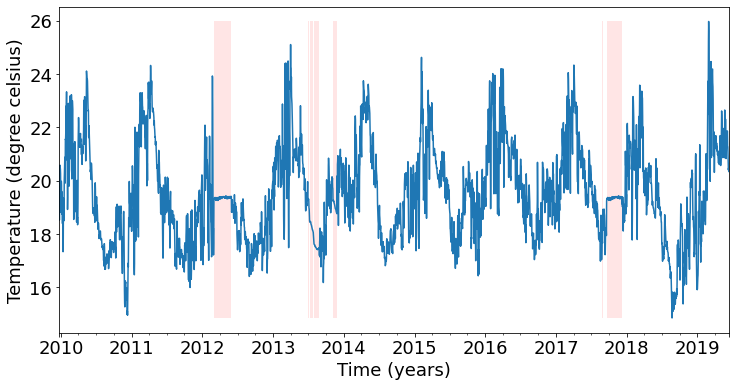

In [66]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
first_temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Text(0.5, 0, 'Time (years)')

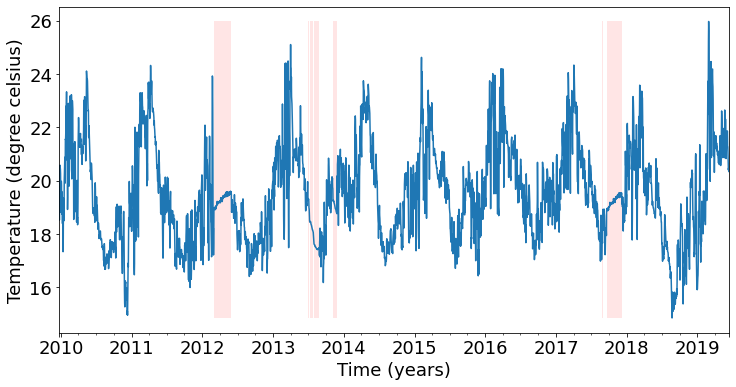

In [67]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
first_temp_df_245_filled_3_4layers.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Second iteration

In [68]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [69]:
#load model if already trained
bidirectional_lstm_targ6_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [70]:
first_temp_df_245_filled = temp_df_245_wgaps.copy()
first_temp_df_245_filled = gapfill(first_temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [71]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [72]:
#load model if already trained
bidirectional_lstm_targ30_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [73]:
first_temp_df_245_filled_2 = first_temp_df_245_filled.copy()
first_temp_df_245_filled_2 = gapfill(first_temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [74]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [75]:
#load model if already trained
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [76]:
first_temp_df_245_filled_3 = first_temp_df_245_filled_2.copy()
first_temp_df_245_filled_3 = gapfill(first_temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

In [77]:
#load model if already trained
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/two/saved_models/bidirectional_lstm_model_hist91_targ91_4layers_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [78]:
first_temp_df_245_filled_3_4layers = first_temp_df_245_filled_2.copy()
first_temp_df_245_filled_3_4layers = gapfill(first_temp_df_245_filled_3_4layers, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

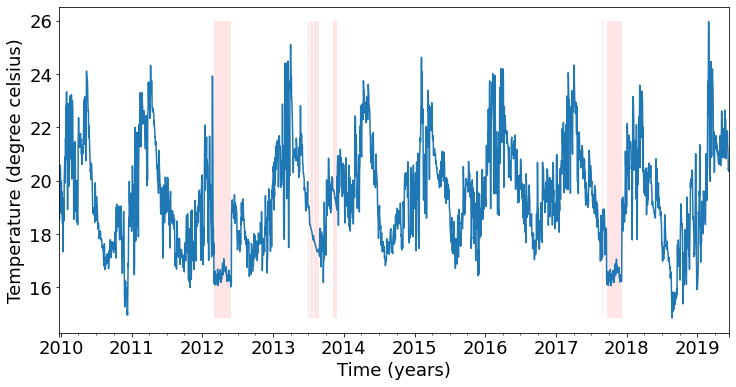

In [79]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
first_temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Text(0.5, 0, 'Time (years)')

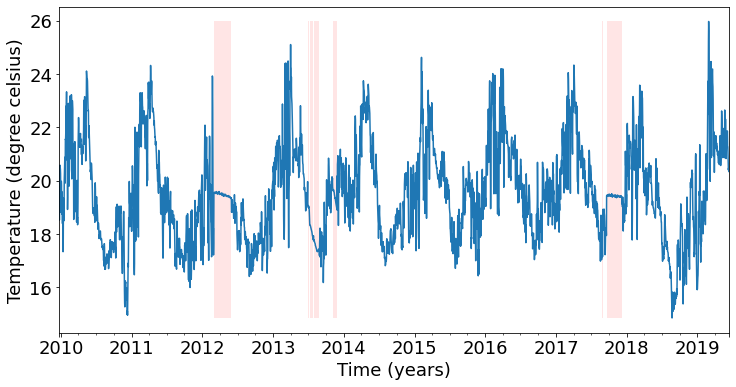

In [80]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
first_temp_df_245_filled_3_4layers.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")

Third iteration

In [81]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ6.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [82]:
#load model if already trained
bidirectional_lstm_targ6_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist30_targ6_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ6_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [83]:
first_temp_df_245_filled = temp_df_245_wgaps.copy()
first_temp_df_245_filled = gapfill(first_temp_df_245_filled, bidirectional_lstm_targ6_model, train_mean, train_std, 30, 6)

In [84]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist30_targ30.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [85]:
#load model if already trained
bidirectional_lstm_targ30_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist30_targ30_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ30_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [86]:
first_temp_df_245_filled_2 = first_temp_df_245_filled.copy()
first_temp_df_245_filled_2 = gapfill(first_temp_df_245_filled_2, bidirectional_lstm_targ30_model, train_mean, train_std, 30, 30)

In [87]:
with open("../data/temp_depth_gapfilling/train_mean-std_train-val_data-labels_hist91_targ91.pickle", "rb") as pickle_in:
    pickle_data = pickle.load(pickle_in)
    train_mean = pickle_data[0]
    train_std = pickle_data[1]
    train_data = pickle_data[2]
    train_labels = pickle_data[3]
    val_data = pickle_data[4]
    val_labels = pickle_data[5]

In [88]:
#load model if already trained
bidirectional_lstm_targ91_model = keras.models.load_model('../data/temp_depth_gapfilling/dropout/three/saved_models/bidirectional_lstm_model_hist91_targ91_loss-descaledmape.h5', compile=False)
bidirectional_lstm_targ91_model.compile(optimizer='adam', loss=descaled_mape(mu=train_mean, sd=train_std), metrics=[descaled_mape(mu=train_mean, sd=train_std), 'mae', 'mse', keras.metrics.MeanAbsolutePercentageError()])

In [89]:
first_temp_df_245_filled_3 = first_temp_df_245_filled_2.copy()
first_temp_df_245_filled_3 = gapfill(first_temp_df_245_filled_3, bidirectional_lstm_targ91_model, train_mean, train_std, 91, 91)

Text(0.5, 0, 'Time (years)')

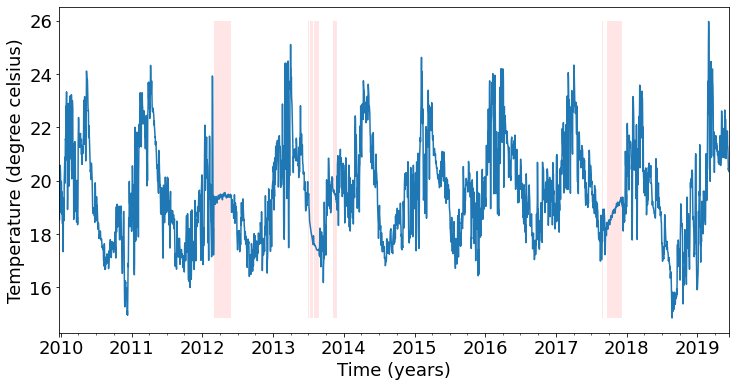

In [90]:
####################
# Below plot is based on the three layer model3
####################
fig, ax = plt.subplots()
import matplotlib.transforms as mtransforms
first_temp_df_245_filled_3.TEMP.plot(ax = ax, figsize=(12,6))
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(temp_df_245_wgaps.index, temp_df_245_wgaps.TEMP.min(), temp_df_245_wgaps.TEMP.max(), where=np.isnan(temp_df_245_wgaps.TEMP),
                facecolor='red', alpha=0.1)
plt.ylabel("Temperature (degree celsius)")
plt.xlabel("Time (years)")